 ## Part 1. load packages & data

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import seaborn as sns
sns.set(color_codes=True)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

customers = pd.read_csv('customers.csv')
orders_items = pd.read_csv('orders_items.csv')
products_skus = pd.read_csv('products_skus.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
traffic = pd.read_csv('traffic.csv', index_col='index')
transactions = pd.read_csv('transactions.csv')

In [300]:
customers.head()

,id,full_name,created_at
0,8652230815,NaN,2016-08-16
1,8686141151,Warren Perez,2016-08-22
2,8686909727,Micheal Robles,2016-08-22
3,8686915935,Michael Ellis,2016-08-22
4,8686918303,Robert Stewart,2016-08-22


In [301]:
customers.shape

(44661, 3)

In [302]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44661 entries, 0 to 44660
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          44661 non-null  int64 
 1   full_name   33699 non-null  object
 2   created_at  44661 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [303]:
orders_items.head()

,id,order_id,product_id,product_style,variant_id,sku,product_title,fulfillment_status,price,quantity
0,13325125855,7675398239,12927629215.0,2c259a42d38f5f097274beff811168e2,50547057311,000d96b3b77b33af530eec77689bd210,5cfd6c4e00b25e6dec5538928206b7b8,NaN,35.0,1
1,13327045983,7676331935,12927632095.0,dd804c4025d230467823200aa82e9219,50547118303,e26c77e84b91c9939c23c3e3ef66475a,0e6e45ad42707e9732119f4b98aec7ce,NaN,79.0,1
2,13327109727,7676363167,12928055775.0,f4e2e3c5433e4120889e2a7e0e0180a8,50553858975,0be0c8bf78ecf36416a40c9012acd19e,bede8c8f4e3c9c9d9a061d9a8d086cdc,NaN,58.0,1
3,13327495903,7676539359,12927625695.0,08ba660ec5643520a73108bef6f3ddd6,50547001887,0503dec809a8a2600d9acc5249900ecb,27d598cb953eff3667f7d051fe795284,fulfilled,25.0,1
4,13327518751,7676549855,12927690655.0,68ac90e5df73ae9b662174b21dc1586f,50548035807,38de0d087208588510907b5c2d149e4b,07dd8ba2ccadf3f3766750f10f6d05b5,fulfilled,25.0,1


In [304]:
orders_items = orders_items.rename(columns={'id':'orders_items_id'})

In [305]:
orders_items.shape

(36826, 10)

In [306]:
orders_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36826 entries, 0 to 36825
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   orders_items_id     36826 non-null  int64  
 1   order_id            36826 non-null  int64  
 2   product_id          36802 non-null  float64
 3   product_style       36826 non-null  object 
 4   variant_id          36826 non-null  int64  
 5   sku                 36826 non-null  object 
 6   product_title       36826 non-null  object 
 7   fulfillment_status  35257 non-null  object 
 8   price               36826 non-null  float64
 9   quantity            36826 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 2.8+ MB


In [307]:
products_skus.head()

,id,product_id,product_style,sku,created_at,price
0,50547147871,12927633311,d510a563d66df17daf05e72a6af123b7,0ecbe4277237cb1207b31815166d37b9,2016-08-18,29.0
1,50547117727,12927632095,dd804c4025d230467823200aa82e9219,f8e9bf1495c45676e8822e7ad4c97a93,2016-08-18,39.5
2,4886503364093,375446050301,8f61ed9720d09c9303fbc0b3184d478d,ccf2a80ad99d9dc449fbd5a904210d2c,2016-11-14,24.0
3,50547000415,12927625695,08ba660ec5643520a73108bef6f3ddd6,db1ea83c6299a2df5e39e420223fbd81,2016-08-18,25.0
4,50547135135,12927632799,6056dc7fb0e6987bfb6d08a8a707446f,c4f9cdb1df7a9add57df53e34290cbeb,2016-08-18,31.5


In [308]:
products_skus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1356 non-null   int64  
 1   product_id     1356 non-null   int64  
 2   product_style  1356 non-null   object 
 3   sku            1356 non-null   object 
 4   created_at     1356 non-null   object 
 5   price          1356 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 63.7+ KB


In [309]:
products_skus.shape

(1356, 6)

In [310]:
orders.head()

,id,created_at,closed_at,cancelled_at,customer_id,financial_status,fulfillment_status,processed_at,total_price,shipping_rate,subtotal_price,total_discounts,total_line_items_price
0,7675398239,2016-08-21,2016-08-25,2016-08-22,8683754719,voided,NaN,2016-08-21,44.57,6.33,35.0,0.0,35.0
1,7676331935,2016-08-22,2016-08-22,NaN,8686224991,refunded,NaN,2016-08-22,124.55,0.00,114.0,0.0,114.0
2,7676363167,2016-08-22,NaN,2016-08-22,8686224991,voided,NaN,2016-08-22,97.68,7.00,83.0,0.0,83.0
3,7676539359,2016-08-22,2016-08-22,NaN,8686915935,paid,fulfilled,2016-08-22,131.10,0.00,120.0,0.0,120.0
4,7676549855,2016-08-22,2016-08-22,NaN,8686924319,paid,fulfilled,2016-08-22,91.12,7.00,77.0,0.0,77.0


In [311]:
orders.shape

(21358, 13)

In [312]:
orders = orders.rename(columns={"id": "order_id", 'created_at':'order_created_at','closed_at':'order_closed_at'})

In [313]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21358 entries, 0 to 21357
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                21358 non-null  int64  
 1   order_created_at        21358 non-null  object 
 2   order_closed_at         20195 non-null  object 
 3   cancelled_at            410 non-null    object 
 4   customer_id             21358 non-null  int64  
 5   financial_status        21358 non-null  object 
 6   fulfillment_status      20680 non-null  object 
 7   processed_at            21358 non-null  object 
 8   total_price             21358 non-null  float64
 9   shipping_rate           21358 non-null  float64
 10  subtotal_price          21358 non-null  float64
 11  total_discounts         21358 non-null  float64
 12  total_line_items_price  21358 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 2.1+ MB


In [314]:
products.head()

,id,title,product_type,created_at,published_at
0,12927633311,6d1eeb39ae340f8d01d93779f80595ed,Dress,2016-08-18,2016-08-18
1,12927632095,0e6e45ad42707e9732119f4b98aec7ce,Bomber,2016-08-18,2016-08-18
2,12927625695,27d598cb953eff3667f7d051fe795284,Shirts,2016-08-18,2018-02-05
3,12928059103,fb337868ffefe5e008e8dc6d6a4f283a,Blazer,2016-08-18,2016-08-18
4,12927632799,d57bc87aca919b4758da6974cdf607fa,Hooide,2016-08-18,NaN


In [315]:
products = products.rename(columns={'id': 'product_id', 'created_at':'product_create_at','published_at':'product_published_at'})

In [316]:
products.shape

(247, 5)

In [317]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_id            247 non-null    int64 
 1   title                 247 non-null    object
 2   product_type          242 non-null    object
 3   product_create_at     247 non-null    object
 4   product_published_at  223 non-null    object
dtypes: int64(1), object(4)
memory usage: 9.8+ KB


In [318]:
traffic.head()

,date_day,page_views,sessions,product_detail_views,product_checkouts,product_adds_to_carts,avg_session_in_s
index,,,,,,,
0,2016-08-17,204,6,0,0,0,2374.1666666667
1,2016-08-18,661,27,0,0,0,1632.1111111111
2,2016-08-19,241,12,0,0,0,1891.2500000000
3,2016-08-20,534,23,0,0,0,1557.9565217391
4,2016-08-21,10276,4946,0,0,0,73.4704811969


In [319]:
traffic.shape

(579, 7)

In [320]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 578
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date_day               579 non-null    object 
 1   page_views             579 non-null    int64  
 2   sessions               579 non-null    int64  
 3   product_detail_views   579 non-null    int64  
 4   product_checkouts      579 non-null    int64  
 5   product_adds_to_carts  579 non-null    int64  
 6   avg_session_in_s       579 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 36.2+ KB


In [321]:
transactions.head()

,order_id,id,parent_id,amount,error_code,kind,status,created_at
0,7675398239,8330669343,NaN,44.57,NaN,authorization,success,2016-08-21
1,7675398239,8331258783,8330669343.0,0.00,NaN,void,success,2016-08-21
2,7676331935,8331688479,NaN,124.55,NaN,authorization,success,2016-08-21
3,7676363167,8331722975,NaN,97.68,NaN,authorization,success,2016-08-21
4,7676539359,8331919391,NaN,131.10,NaN,authorization,success,2016-08-21


In [322]:
transactions.shape

(27563, 8)

In [323]:
transactions = transactions.rename(columns={'id':'transaction_id','created_at':'transaction_created_at'})

In [324]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27563 entries, 0 to 27562
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                27563 non-null  int64  
 1   transaction_id          27563 non-null  int64  
 2   parent_id               4877 non-null   float64
 3   amount                  27563 non-null  float64
 4   error_code              1643 non-null   object 
 5   kind                    27563 non-null  object 
 6   status                  27563 non-null  object 
 7   transaction_created_at  27563 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.7+ MB


## Part 2 EDA

### 1  Check missing value and data cleaning

#### 1.1 check duplicated rows

In [325]:

orders.duplicated().value_counts()

False    21358
dtype: int64

In [326]:
customers.duplicated().value_counts()

False    44661
dtype: int64

In [327]:
products_skus.duplicated().value_counts()

False    1356
dtype: int64

In [328]:
products.duplicated().value_counts()

False    247
dtype: int64

In [329]:
traffic.duplicated().value_counts()

False    579
dtype: int64

In [330]:
transactions.duplicated().value_counts()

False    27563
dtype: int64

In [331]:
orders_items.duplicated().value_counts()

False    36826
dtype: int64

#### 1.2 check missing value

In [332]:
#check missing value

In [333]:
# 1) customers table
print ('customers dataset ({} rows) \n null value of each variable:\n'.format(customers.shape[0]))
print (customers.isnull().sum())

customers dataset (44661 rows) 
 null value of each variable:

id                0
full_name     10962
created_at        0
dtype: int64


In [334]:
# 2) orders table
print ('orders dataset ({} rows) \n null value of each variable:\n'.format(orders.shape[0]))
print (orders.isnull().sum())

orders dataset (21358 rows) 
 null value of each variable:

order_id                      0
order_created_at              0
order_closed_at            1163
cancelled_at              20948
customer_id                   0
financial_status              0
fulfillment_status          678
processed_at                  0
total_price                   0
shipping_rate                 0
subtotal_price                0
total_discounts               0
total_line_items_price        0
dtype: int64


In [335]:
# 3) products table
print ('products dataset ({} rows) \n null value of each variable:\n'.format(products.shape[0]))
print (products.isnull().sum())

products dataset (247 rows) 
 null value of each variable:

product_id               0
title                    0
product_type             5
product_create_at        0
product_published_at    24
dtype: int64


In [336]:
# 4) products_skus table
print ('products_skus dataset ({} rows) \n null value of each variable:\n'.format(products_skus.shape[0]))
print (products_skus.isnull().sum())

products_skus dataset (1356 rows) 
 null value of each variable:

id               0
product_id       0
product_style    0
sku              0
created_at       0
price            0
dtype: int64


In [337]:
# 5) orders_items table
print ('orders_items dataset ({} rows) \n null value of each variable:\n'.format(orders_items.shape[0]))
print (orders_items.isnull().sum())

orders_items dataset (36826 rows) 
 null value of each variable:

orders_items_id          0
order_id                 0
product_id              24
product_style            0
variant_id               0
sku                      0
product_title            0
fulfillment_status    1569
price                    0
quantity                 0
dtype: int64


In [338]:
# 6) transactions table
print ('transactions dataset ({} rows) \n null value of each variable:\n'.format(transactions.shape[0]))
print (transactions.isnull().sum())

transactions dataset (27563 rows) 
 null value of each variable:

order_id                      0
transaction_id                0
parent_id                 22686
amount                        0
error_code                25920
kind                          0
status                        0
transaction_created_at        0
dtype: int64


In [339]:
# 7) traffic table
print ('traffic dataset ({} rows) \n null value of each variable:\n'.format(traffic.shape[0]))
print (traffic.isnull().sum())

traffic dataset (579 rows) 
 null value of each variable:

date_day                 0
page_views               0
sessions                 0
product_detail_views     0
product_checkouts        0
product_adds_to_carts    0
avg_session_in_s         0
dtype: int64


#### 1.3 check incorrect words

In [340]:
products['product_type'].unique()

array(['Dress', 'Bomber', 'Shirts', 'Blazer', 'Hooide', 'Tunic', 'Blouse',
       'Skirt', 'Top', 'TANK', 'Tousers', 'Sweater', 'Cardigan',
       'Trousers', 'Jumpsuit', 'Gift Card', 'hoodie', 'Jacket', 'romper',
       'Shorts', 'mini', 'Bodysuit', nan, 'crop top', 'Pullover', 'Pants',
       'maxi', 'midi', 'Accessory'], dtype=object)

In [341]:
spelling = {'hoodie': 'Hoodie', 'Hooide':'Hoodie', 'Tousers': 'Trousers'}
products['product_type'].replace(spelling, inplace=True)

In [342]:
products['product_type'].unique()

array(['Dress', 'Bomber', 'Shirts', 'Blazer', 'Hoodie', 'Tunic', 'Blouse',
       'Skirt', 'Top', 'TANK', 'Trousers', 'Sweater', 'Cardigan',
       'Jumpsuit', 'Gift Card', 'Jacket', 'romper', 'Shorts', 'mini',
       'Bodysuit', nan, 'crop top', 'Pullover', 'Pants', 'maxi', 'midi',
       'Accessory'], dtype=object)

In [343]:
#check outlier/anomaly
## check total orders of each customer, the outlier value from customer id 280479208957
orders[['customer_id','order_id']].groupby('customer_id').agg('count').sort_values(by=['order_id'],ascending=False).head(5)

,order_id
customer_id,
280479208957,355
413798176253,27
8689371999,25
8688688863,24
8689196063,20


In the exploratory data analysis, we observed that there is one customer spend over 350 orders.

In [344]:
## check how much custoemr_id 280479208957 spend in each order
orders[orders['customer_id']==280479208957][['order_created_at','total_price']]
## mostly spend no money

,order_created_at,total_price
70,2017-03-16,0.0
6760,2017-02-06,0.0
7396,2017-02-06,0.0
7508,2017-02-01,0.0
7512,2017-02-06,0.0
...,...,...
21172,2018-03-14,0.0
21173,2018-03-14,0.0
21175,2018-03-14,0.0
21240,2018-03-18,0.0


In [345]:
# delete custoemr_id 280479208957
fake_orders = orders[orders['customer_id']==280479208957]['order_id'].tolist()
customers.drop(customers.loc[customers['id']==280479208957].index, inplace=True)
orders.drop(orders.loc[orders['customer_id']==280479208957].index, inplace=True)
orders_items.drop(orders_items.loc[orders_items['order_id'].isin(fake_orders)].index, inplace=True)

Customer id 280479208957 placed 350+ orders but mostly spent no money, probably a test account. So we delete the records from this customer.

### 2. Merging the dataset

In [346]:
orders['order_created_at'] = pd.to_datetime(orders['order_created_at'])

In [347]:
# merge table orders_items, products
#products.rename(columns={'id':'product_id'},inplace=True)
df2_1 = pd.merge(left=orders_items, right=products, how='left', on='product_id')
df2_1.head()

,orders_items_id,order_id,product_id,product_style,variant_id,sku,product_title,fulfillment_status,price,quantity,title,product_type,product_create_at,product_published_at
0,13325125855,7675398239,12927629215.0,2c259a42d38f5f097274beff811168e2,50547057311,000d96b3b77b33af530eec77689bd210,5cfd6c4e00b25e6dec5538928206b7b8,NaN,35.0,1,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaN
1,13327045983,7676331935,12927632095.0,dd804c4025d230467823200aa82e9219,50547118303,e26c77e84b91c9939c23c3e3ef66475a,0e6e45ad42707e9732119f4b98aec7ce,NaN,79.0,1,0e6e45ad42707e9732119f4b98aec7ce,Bomber,2016-08-18,2016-08-18
2,13327109727,7676363167,12928055775.0,f4e2e3c5433e4120889e2a7e0e0180a8,50553858975,0be0c8bf78ecf36416a40c9012acd19e,bede8c8f4e3c9c9d9a061d9a8d086cdc,NaN,58.0,1,bede8c8f4e3c9c9d9a061d9a8d086cdc,Trousers,2016-08-18,2016-08-18
3,13327495903,7676539359,12927625695.0,08ba660ec5643520a73108bef6f3ddd6,50547001887,0503dec809a8a2600d9acc5249900ecb,27d598cb953eff3667f7d051fe795284,fulfilled,25.0,1,27d598cb953eff3667f7d051fe795284,Shirts,2016-08-18,2018-02-05
4,13327518751,7676549855,12927690655.0,68ac90e5df73ae9b662174b21dc1586f,50548035807,38de0d087208588510907b5c2d149e4b,07dd8ba2ccadf3f3766750f10f6d05b5,fulfilled,25.0,1,07dd8ba2ccadf3f3766750f10f6d05b5,Shirts,2016-08-18,NaN


In [348]:
orders.head(2)

,order_id,order_created_at,order_closed_at,cancelled_at,customer_id,financial_status,fulfillment_status,processed_at,total_price,shipping_rate,subtotal_price,total_discounts,total_line_items_price
0,7675398239,2016-08-21,2016-08-25,2016-08-22,8683754719,voided,NaN,2016-08-21,44.57,6.33,35.0,0.0,35.0
1,7676331935,2016-08-22,2016-08-22,NaN,8686224991,refunded,NaN,2016-08-22,124.55,0.00,114.0,0.0,114.0


In [349]:
#merge table df2_1, orders
#orders_items.rename(columns={'price':'total_price'},inplace=True)
#orders.rename(columns={'id':'order_id'},inplace=True)
df2_2 = pd.merge(left=df2_1, right=orders, how='left', on=['order_id'])
df2_2.head()

,orders_items_id,order_id,product_id,product_style,variant_id,sku,product_title,fulfillment_status_x,price,quantity,title,product_type,product_create_at,product_published_at,order_created_at,order_closed_at,cancelled_at,customer_id,financial_status,fulfillment_status_y,processed_at,total_price,shipping_rate,subtotal_price,total_discounts,total_line_items_price
0,13325125855,7675398239,12927629215.0,2c259a42d38f5f097274beff811168e2,50547057311,000d96b3b77b33af530eec77689bd210,5cfd6c4e00b25e6dec5538928206b7b8,NaN,35.0,1,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaN,2016-08-21,2016-08-25,2016-08-22,8683754719.0,voided,NaN,2016-08-21,44.57,6.33,35.0,0.0,35.0
1,13327045983,7676331935,12927632095.0,dd804c4025d230467823200aa82e9219,50547118303,e26c77e84b91c9939c23c3e3ef66475a,0e6e45ad42707e9732119f4b98aec7ce,NaN,79.0,1,0e6e45ad42707e9732119f4b98aec7ce,Bomber,2016-08-18,2016-08-18,2016-08-22,2016-08-22,NaN,8686224991.0,refunded,NaN,2016-08-22,124.55,0.00,114.0,0.0,114.0
2,13327109727,7676363167,12928055775.0,f4e2e3c5433e4120889e2a7e0e0180a8,50553858975,0be0c8bf78ecf36416a40c9012acd19e,bede8c8f4e3c9c9d9a061d9a8d086cdc,NaN,58.0,1,bede8c8f4e3c9c9d9a061d9a8d086cdc,Trousers,2016-08-18,2016-08-18,2016-08-22,NaN,2016-08-22,8686224991.0,voided,NaN,2016-08-22,97.68,7.00,83.0,0.0,83.0
3,13327495903,7676539359,12927625695.0,08ba660ec5643520a73108bef6f3ddd6,50547001887,0503dec809a8a2600d9acc5249900ecb,27d598cb953eff3667f7d051fe795284,fulfilled,25.0,1,27d598cb953eff3667f7d051fe795284,Shirts,2016-08-18,2018-02-05,2016-08-22,2016-08-22,NaN,8686915935.0,paid,fulfilled,2016-08-22,131.10,0.00,120.0,0.0,120.0
4,13327518751,7676549855,12927690655.0,68ac90e5df73ae9b662174b21dc1586f,50548035807,38de0d087208588510907b5c2d149e4b,07dd8ba2ccadf3f3766750f10f6d05b5,fulfilled,25.0,1,07dd8ba2ccadf3f3766750f10f6d05b5,Shirts,2016-08-18,NaN,2016-08-22,2016-08-22,NaN,8686924319.0,paid,fulfilled,2016-08-22,91.12,7.00,77.0,0.0,77.0


In [350]:
#df2_2.info()

In [351]:
df2_2['order_item_sale'] = df2_2['price']*df2_2['quantity']

In [352]:
transactions = transactions.rename(columns={'id':'transaction_id','created_at':'transaction_created_at'})
transactions.head()

,order_id,transaction_id,parent_id,amount,error_code,kind,status,transaction_created_at
0,7675398239,8330669343,NaN,44.57,NaN,authorization,success,2016-08-21
1,7675398239,8331258783,8330669343.0,0.00,NaN,void,success,2016-08-21
2,7676331935,8331688479,NaN,124.55,NaN,authorization,success,2016-08-21
3,7676363167,8331722975,NaN,97.68,NaN,authorization,success,2016-08-21
4,7676539359,8331919391,NaN,131.10,NaN,authorization,success,2016-08-21


In [353]:
#merge tables orders and items,left join
#order_id=id,price=totoal_price
df2_3 = pd.merge(left=df2_2, right=transactions, how='left', on='order_id')
df2_3.head()

,orders_items_id,order_id,product_id,product_style,variant_id,sku,product_title,fulfillment_status_x,price,quantity,title,product_type,product_create_at,product_published_at,order_created_at,order_closed_at,cancelled_at,customer_id,financial_status,fulfillment_status_y,processed_at,total_price,shipping_rate,subtotal_price,total_discounts,total_line_items_price,order_item_sale,transaction_id,parent_id,amount,error_code,kind,status,transaction_created_at
0,13325125855,7675398239,12927629215.0,2c259a42d38f5f097274beff811168e2,50547057311,000d96b3b77b33af530eec77689bd210,5cfd6c4e00b25e6dec5538928206b7b8,NaN,35.0,1,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaN,2016-08-21,2016-08-25,2016-08-22,8683754719.0,voided,NaN,2016-08-21,44.57,6.33,35.0,0.0,35.0,35.0,8330669343.0,NaN,44.57,NaN,authorization,success,2016-08-21
1,13325125855,7675398239,12927629215.0,2c259a42d38f5f097274beff811168e2,50547057311,000d96b3b77b33af530eec77689bd210,5cfd6c4e00b25e6dec5538928206b7b8,NaN,35.0,1,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaN,2016-08-21,2016-08-25,2016-08-22,8683754719.0,voided,NaN,2016-08-21,44.57,6.33,35.0,0.0,35.0,35.0,8331258783.0,8330669343.0,0.00,NaN,void,success,2016-08-21
2,13327045983,7676331935,12927632095.0,dd804c4025d230467823200aa82e9219,50547118303,e26c77e84b91c9939c23c3e3ef66475a,0e6e45ad42707e9732119f4b98aec7ce,NaN,79.0,1,0e6e45ad42707e9732119f4b98aec7ce,Bomber,2016-08-18,2016-08-18,2016-08-22,2016-08-22,NaN,8686224991.0,refunded,NaN,2016-08-22,124.55,0.00,114.0,0.0,114.0,79.0,8331688479.0,NaN,124.55,NaN,authorization,success,2016-08-21
3,13327045983,7676331935,12927632095.0,dd804c4025d230467823200aa82e9219,50547118303,e26c77e84b91c9939c23c3e3ef66475a,0e6e45ad42707e9732119f4b98aec7ce,NaN,79.0,1,0e6e45ad42707e9732119f4b98aec7ce,Bomber,2016-08-18,2016-08-18,2016-08-22,2016-08-22,NaN,8686224991.0,refunded,NaN,2016-08-22,124.55,0.00,114.0,0.0,114.0,79.0,8333317599.0,8331688479.0,124.55,NaN,capture,success,2016-08-22
4,13327045983,7676331935,12927632095.0,dd804c4025d230467823200aa82e9219,50547118303,e26c77e84b91c9939c23c3e3ef66475a,0e6e45ad42707e9732119f4b98aec7ce,NaN,79.0,1,0e6e45ad42707e9732119f4b98aec7ce,Bomber,2016-08-18,2016-08-18,2016-08-22,2016-08-22,NaN,8686224991.0,refunded,NaN,2016-08-22,124.55,0.00,114.0,0.0,114.0,79.0,8333318239.0,8333317599.0,124.55,NaN,refund,success,2016-08-22


In [354]:
#df2_3.isnull().sum()

In [355]:
#percentage = 100 * df2_3.isnull().sum() / len(df2_3)
#percentage

In [356]:
# select order_item status is fulfilled & transaction status is success 
df = df2_3[(df2_3['fulfillment_status_x'] == 'fulfilled') & (df2_3['status'] == 'success')]


In [357]:
# extract month in year information
df['month_year'] = df['order_created_at'].dt.to_period('M')

### 3  view the trend of charateristic

In [358]:
df.head()

,orders_items_id,order_id,product_id,product_style,variant_id,sku,product_title,fulfillment_status_x,price,quantity,title,product_type,product_create_at,product_published_at,order_created_at,order_closed_at,cancelled_at,customer_id,financial_status,fulfillment_status_y,processed_at,total_price,shipping_rate,subtotal_price,total_discounts,total_line_items_price,order_item_sale,transaction_id,parent_id,amount,error_code,kind,status,transaction_created_at,month_year
7,13327495903,7676539359,12927625695.0,08ba660ec5643520a73108bef6f3ddd6,50547001887,0503dec809a8a2600d9acc5249900ecb,27d598cb953eff3667f7d051fe795284,fulfilled,25.0,1,27d598cb953eff3667f7d051fe795284,Shirts,2016-08-18,2018-02-05,2016-08-22,2016-08-22,NaN,8686915935.0,paid,fulfilled,2016-08-22,131.10,0.0,120.0,0.0,120.0,25.0,8331919391.0,NaN,131.10,NaN,authorization,success,2016-08-21,2016-08
8,13327495903,7676539359,12927625695.0,08ba660ec5643520a73108bef6f3ddd6,50547001887,0503dec809a8a2600d9acc5249900ecb,27d598cb953eff3667f7d051fe795284,fulfilled,25.0,1,27d598cb953eff3667f7d051fe795284,Shirts,2016-08-18,2018-02-05,2016-08-22,2016-08-22,NaN,8686915935.0,paid,fulfilled,2016-08-22,131.10,0.0,120.0,0.0,120.0,25.0,8333205471.0,8331919391.0,131.10,NaN,capture,success,2016-08-22,2016-08
9,13327518751,7676549855,12927690655.0,68ac90e5df73ae9b662174b21dc1586f,50548035807,38de0d087208588510907b5c2d149e4b,07dd8ba2ccadf3f3766750f10f6d05b5,fulfilled,25.0,1,07dd8ba2ccadf3f3766750f10f6d05b5,Shirts,2016-08-18,NaN,2016-08-22,2016-08-22,NaN,8686924319.0,paid,fulfilled,2016-08-22,91.12,7.0,77.0,0.0,77.0,25.0,8331930399.0,NaN,91.12,NaN,authorization,success,2016-08-21,2016-08
10,13327518751,7676549855,12927690655.0,68ac90e5df73ae9b662174b21dc1586f,50548035807,38de0d087208588510907b5c2d149e4b,07dd8ba2ccadf3f3766750f10f6d05b5,fulfilled,25.0,1,07dd8ba2ccadf3f3766750f10f6d05b5,Shirts,2016-08-18,NaN,2016-08-22,2016-08-22,NaN,8686924319.0,paid,fulfilled,2016-08-22,91.12,7.0,77.0,0.0,77.0,25.0,8333205599.0,8331930399.0,91.12,NaN,capture,success,2016-08-22,2016-08
11,13327526495,7676553055,12950530079.0,8945e6be376ffa754e06840e4865cc24,50766799839,2931fc65c83f771a597527925ff97131,08bbf9d4710e8bdbfd07c763ecb2f9e3,fulfilled,68.0,1,08bbf9d4710e8bdbfd07c763ecb2f9e3,Jumpsuit,2016-08-21,NaN,2016-08-22,2016-08-22,NaN,8687041311.0,paid,fulfilled,2016-08-22,75.00,7.0,68.0,0.0,68.0,68.0,8331934431.0,NaN,75.00,NaN,authorization,success,2016-08-21,2016-08


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43181 entries, 7 to 49648
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   orders_items_id         43181 non-null  int64         
 1   order_id                43181 non-null  int64         
 2   product_id              43144 non-null  float64       
 3   product_style           43181 non-null  object        
 4   variant_id              43181 non-null  int64         
 5   sku                     43181 non-null  object        
 6   product_title           43181 non-null  object        
 7   fulfillment_status_x    43181 non-null  object        
 8   price                   43181 non-null  float64       
 9   quantity                43181 non-null  int64         
 10  title                   43144 non-null  object        
 11  product_type            43144 non-null  object        
 12  product_create_at       43144 non-null  object

#### A. sales of different product in season and month

In [360]:
#按两个条件groupby 并sales 的sum结果
df2_4 = df.groupby(['month_year', 'product_type']).agg('sum')['order_item_sale']

In [361]:
#转至矩阵
df111 = df2_4.unstack('month_year').transpose()
df111

product_type,Blazer,Blouse,Bodysuit,Bomber,Cardigan,Dress,Gift Card,Hoodie,Jacket,Jumpsuit,Pants,Pullover,Shirts,Shorts,Skirt,Sweater,TANK,Top,Trousers,Tunic,crop top,maxi,midi,mini,romper
month_year,,,,,,,,,,,,,,,,,,,,,,,,,
2016-08,18644.0,13184.0,3936.0,15484.00,4140.00,18500.00,NaN,16785.00,8990.00,18768.00,NaN,12348.0,18875.0,NaN,11636.00,8120.0,NaN,11886.00,21967.0,21735.0,NaN,NaN,NaN,NaN,NaN
2016-09,3884.0,1396.0,928.0,5451.00,9246.00,4514.00,NaN,15795.00,2294.00,2040.00,NaN,3402.0,17650.0,NaN,2857.00,812.0,NaN,4464.00,10452.0,11235.0,NaN,NaN,NaN,NaN,NaN
2016-10,1874.0,440.0,384.0,3634.00,13386.00,1692.00,NaN,12195.00,806.00,680.00,NaN,840.0,8425.0,NaN,1035.00,174.0,NaN,1678.00,5506.0,7000.0,NaN,NaN,NaN,NaN,NaN
2016-11,2156.4,1629.6,790.4,10639.40,11971.50,16770.60,NaN,33499.50,1302.00,5494.40,NaN,1843.8,19132.5,NaN,9199.10,884.0,6365.0,32530.20,28065.0,8389.5,NaN,NaN,NaN,NaN,NaN
2016-12,408.0,104.0,128.0,2237.00,2703.00,9666.00,NaN,10234.00,1892.00,1428.00,NaN,126.0,2025.0,NaN,3166.00,3802.0,3541.0,12630.00,6763.0,315.0,NaN,NaN,NaN,NaN,NaN
2017-01,68.0,174.0,32.0,1164.00,1140.00,6943.00,NaN,7574.00,1136.00,340.00,NaN,126.0,950.0,NaN,1818.00,1040.0,2503.0,6150.00,4742.0,140.0,NaN,NaN,NaN,NaN,NaN
2017-02,331.0,NaN,96.0,1904.75,4127.19,8402.12,NaN,10878.23,1099.90,1711.81,NaN,252.0,650.0,NaN,2527.52,1144.0,3225.0,9788.11,7750.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,682.6,10842.8,153.6,1633.70,409.20,14039.36,NaN,3530.00,10662.40,1040.40,NaN,29.4,10938.5,7448.0,4037.30,10214.0,2450.0,20134.60,19640.8,NaN,NaN,NaN,NaN,NaN,3534.0
2017-04,190.4,6154.0,22.4,1506.40,313.50,10389.84,NaN,3323.50,4309.60,2454.80,NaN,NaN,16650.0,4864.0,1887.40,5757.8,1856.0,15434.40,11941.2,NaN,NaN,NaN,NaN,NaN,2204.0


In [372]:
# fig = plt.figure(figsize=(12,8))
# ax = plt.subplot(111)
# cmap = sns.color_palette("gist_rainbow_r")
# df111.plot(ax=ax, color=cmap)
# ax.legend(bbox_to_anchor=(1.1, 1))
# plt.title('Sales of Different Products over Months', fontsize=18)
# plt.ylabel('sales', fontsize=15)
# plt.show()

In [373]:
column1 = ['Blazer', 'Blouse', 'Bodysuit', 'Bomber', 'Cardigan', 'Dress', 'Gift Card']
column2 = ['Hoodie', 'Jacket', 'Jumpsuit', 'Pants', 'Pullover', 'Shirts', 'Shorts']
column3 = ['Skirt', 'Sweater', 'TANK', 'Top', 'Trousers', 'Tunic']
column4 = ['crop top', 'maxi', 'midi', 'mini', 'romper']

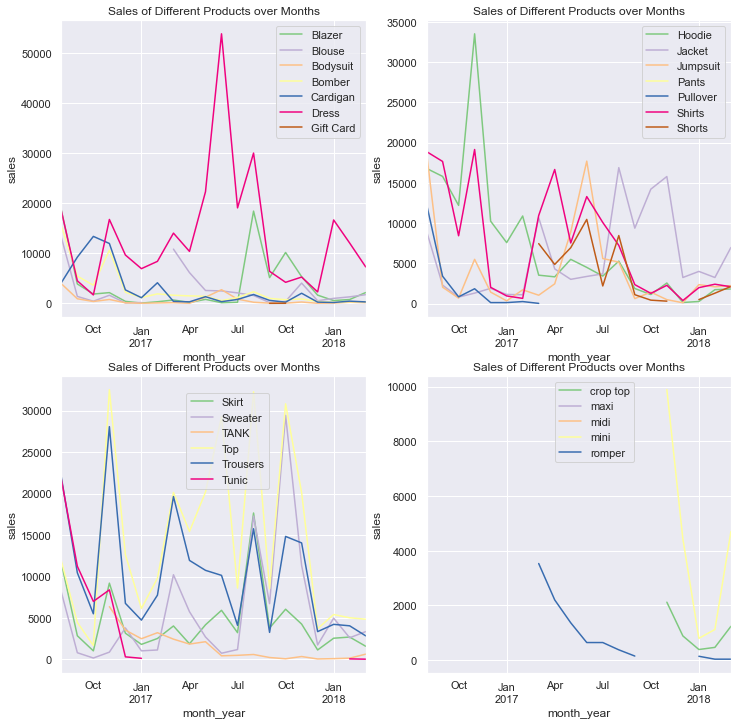

In [374]:
# plot sales from the 27 different products over the months

fig = plt.figure(figsize=(12,12))

ax1 = plt.subplot(221)
cmap = sns.color_palette("Accent")
df111[column1].plot(color=cmap,ax=ax1)
ax1.legend(bbox_to_anchor=(1, 1))
ax1.set_ylabel('sales')
ax1.set_title('Sales of Different Products over Months')

ax2 = plt.subplot(222)
cmap = sns.color_palette("Accent")
df111[column2].plot(color=cmap,ax=ax2)
ax2.legend(bbox_to_anchor=(1, 1))
ax2.set_ylabel('sales')
ax2.set_title('Sales of Different Products over Months')

ax3 = plt.subplot(223)
cmap = sns.color_palette("Accent")
df111[column3].plot(color=cmap,ax=ax3)
ax3.legend(bbox_to_anchor=(0.7, 0.6))
ax3.set_ylabel('sales')
ax3.set_title('Sales of Different Products over Months')

ax4 = plt.subplot(224)
cmap = sns.color_palette("Accent")
df111[column4].plot(color=cmap,ax=ax4)
ax4.legend(bbox_to_anchor=(0.7, 1))
ax4.set_ylabel('sales')
ax4.set_title('Sales of Different Products over Months')

plt.show()

The figure shows the sales trend for different product type from August 2016 to March 2018. We can see there is a seasonal effect of sales for differenct type of products.

#### B. popular product

In [375]:
#popular product type
df2_5 = df[['product_type','order_item_sale']].groupby(['product_type']).agg('sum')

In [376]:
df2_5 = df2_5.sort_values(by='order_item_sale', ascending=False).head(15)
df2_5

,order_item_sale
product_type,
Top,283482.8099999998
Dress,270409.3599999995
Trousers,204227.8000000009
Shirts,146173.7999999999
Hoodie,142001.8300000009
Jacket,116252.0400000001
Sweater,114088.3000000002
Skirt,91283.0600000000
Jumpsuit,80593.8100000001


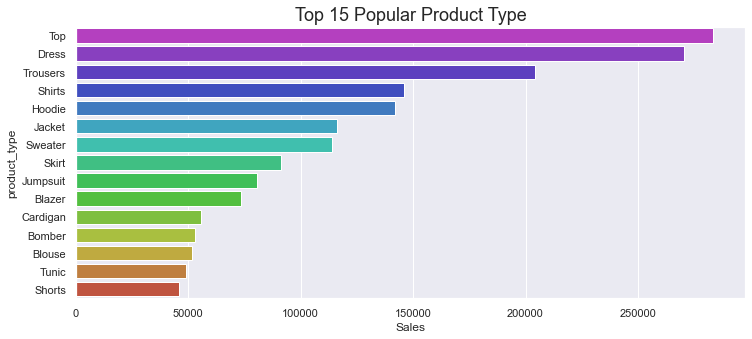

In [377]:
f, ax= plt.subplots(figsize=(12,5))
ax = sns.barplot(y=df2_5.index, x=df2_5['order_item_sale'], palette="gist_rainbow_r", saturation=.5)
ax.set_xlabel('Sales', fontsize=12)
ax.set_title('Top 15 Popular Product Type', fontsize=18)
plt.show()

In [378]:
#popular product item
df2_6 = df[['product_id','order_item_sale','product_type']].groupby(['product_id']).agg('sum').sort_values(by=['order_item_sale'],ascending=False).head(15)

In [379]:
df2_6.head()

,order_item_sale
product_id,
12927632799.0,58401.0000000000
12927629215.0,48919.5000000000
12927632095.0,41214.3000000001
12928057823.0,40282.2000000000
12927690655.0,38617.5000000000


In [380]:
df2_6.index = df2_6.index.astype('category')

AttributeError: 'AxesSubplot' object has no attribute 'set_xl'

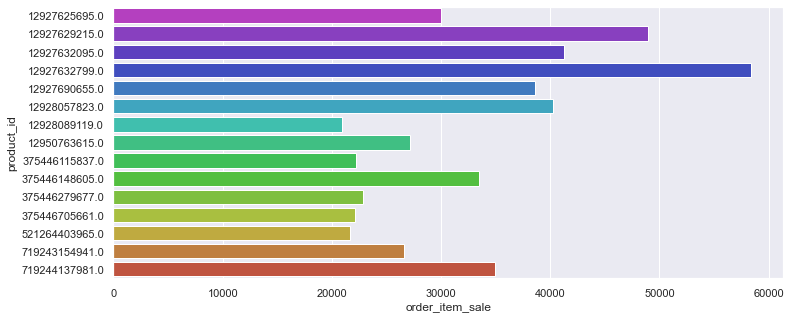

In [382]:
f, ax= plt.subplots(figsize=(12,5))
ax = sns.barplot(y=df2_6.index, x=df2_6['order_item_sale'], palette="gist_rainbow_r", saturation=.5)
ax.set_xl#abel('Sales', fontsize=12)
ax.set_title('Top 15 Popular Product Item', fontsize=18)
plt.show()

#### C. total order of each customer

In [383]:
#选定特定的数据集范围，按照一个列groupby并count，再按照某一个指标排序
df2_7 = orders[['customer_id','order_id']].groupby('customer_id').agg('count').sort_values(by=['order_id'],ascending=False)

In [384]:
df2_7.head()

,order_id
customer_id,
413798176253,27
8689371999,25
8688688863,24
8689196063,20
8689195551,19


In [385]:
"""f, ax= plt.subplots(figsize=(12,5))
ax = sns.barplot(x=df2_7.index, y=df2_7['order_id'], palette="gist_rainbow_r", saturation=.5)
ax.set_xlabel('Sales', fontsize=12)
ax.set_title('Top 15 loyal order_id', fontsize=18)
plt.show()"""

'f, ax= plt.subplots(figsize=(12,5))\nax = sns.barplot(x=df2_7.index, y=df2_7[\'order_id\'], palette="gist_rainbow_r", saturation=.5)\nax.set_xlabel(\'Sales\', fontsize=12)\nax.set_title(\'Top 15 loyal order_id\', fontsize=18)\nplt.show()'

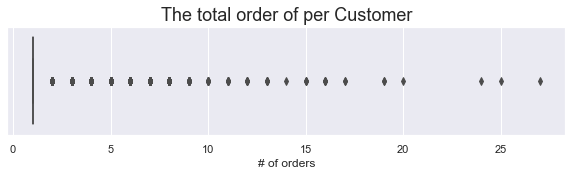

In [386]:
# one user spend over 350 orders
f, ax= plt.subplots(figsize=(10,2))
sns.boxplot(df2_7['order_id'])
ax.set_title('The total order of per Customer', fontsize=18)
ax.set_xlabel('# of orders', fontsize=12)
plt.show()

Most customers placed less than 30 orders in the online store, except one customer placed over 350 orders.

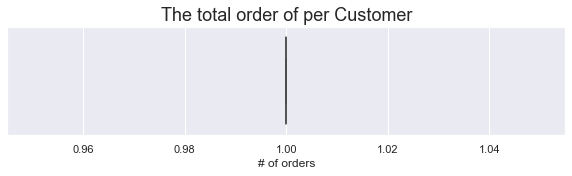

In [387]:
f, ax= plt.subplots(figsize=(10,2))
sns.boxplot(df2_7['order_id'], showfliers=False)
ax.set_title('The total order of per Customer', fontsize=18)
ax.set_xlabel('# of orders', fontsize=12)
plt.show()

#Most customers placed only one order in the online store.

###### D. how much each user spend

In [388]:
value_per_user = df[['customer_id','order_item_sale']].groupby(['customer_id']).agg('sum')

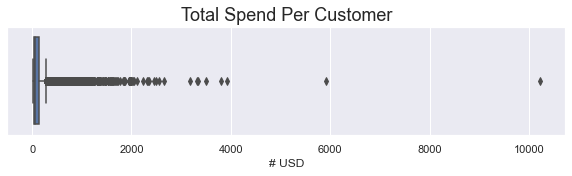

In [389]:
# A typical user spends $65.00 (median) in the store
f, ax= plt.subplots(figsize=(10,2))
sns.boxplot(value_per_user['order_item_sale'])
ax.set_title('Total Spend Per Customer', fontsize=18)
ax.set_xlabel('# USD', fontsize=12)
plt.show()

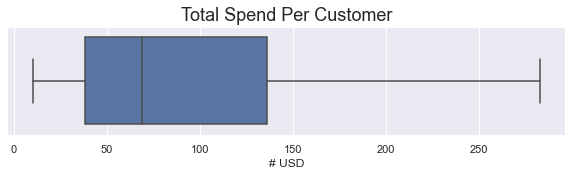

In [390]:
f, ax= plt.subplots(figsize=(10,2))
sns.boxplot(value_per_user['order_item_sale'], showfliers=False)
ax.set_title('Total Spend Per Customer', fontsize=18)
ax.set_xlabel('# USD', fontsize=12)
plt.show()

#### D. how many items per order

In [391]:
df2_8 = df[['order_id','product_id']].groupby(['order_id']).agg('count')

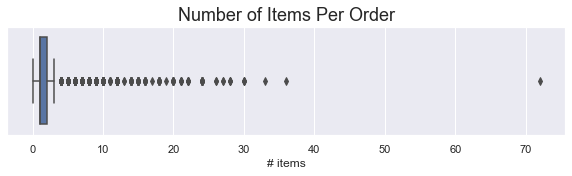

In [392]:
f, ax= plt.subplots(figsize=(10,2))
sns.boxplot(df2_8['product_id'])
ax.set_title('Number of Items Per Order', fontsize=18)
ax.set_xlabel('# items', fontsize=12)
plt.show()

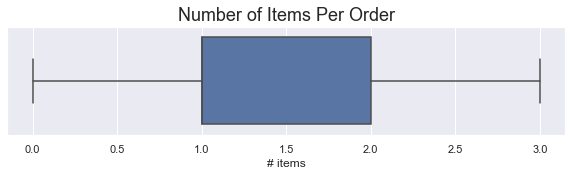

In [393]:
f, ax= plt.subplots(figsize=(10,2))
sns.boxplot(df2_8['product_id'], showfliers=False)
ax.set_title('Number of Items Per Order', fontsize=18)
ax.set_xlabel('# items', fontsize=12)
plt.show()

Median customers placed 1.5 items in each order.

## Part 3: web Analytics

### 1. How’s the trend of website traffic and the number of orders over time? Is there any correlation between the orders and the website traffic?


In [394]:
traffic['date_day'] = pd.to_datetime(traffic['date_day'])

In [395]:
orders['order_created_at'] = pd.to_datetime(orders['order_created_at'])

In [396]:
num_orders = orders.groupby('order_created_at').count()

In [397]:
num_orders.head()

,order_id,order_closed_at,cancelled_at,customer_id,financial_status,fulfillment_status,processed_at,total_price,shipping_rate,subtotal_price,total_discounts,total_line_items_price
order_created_at,,,,,,,,,,,,
2016-08-21,1,1,1,1,1,0,1,1,1,1,1,1
2016-08-22,794,780,16,794,794,775,794,794,794,794,794,794
2016-08-23,183,179,4,183,183,180,183,183,183,183,183,183
2016-08-24,44,43,0,44,44,44,44,44,44,44,44,44
2016-08-25,62,61,3,62,62,54,62,62,62,62,62,62


In [398]:
dfq1 = pd.merge(traffic, num_orders, how='inner', left_on = 'date_day', right_on='order_created_at')

In [399]:
dfq1 = dfq1.rename(columns={'order_id':'order_count'})

In [400]:
dfq1.head()

,date_day,page_views,sessions,product_detail_views,product_checkouts,product_adds_to_carts,avg_session_in_s,order_count,order_closed_at,cancelled_at,customer_id,financial_status,fulfillment_status,processed_at,total_price,shipping_rate,subtotal_price,total_discounts,total_line_items_price
0,2016-08-21,10276,4946,0,0,0,73.4704811969,1,1,1,1,1,0,1,1,1,1,1,1
1,2016-08-22,625003,146860,175257,5639,10851,142.4078373962,794,780,16,794,794,775,794,794,794,794,794,794
2,2016-08-23,220707,61654,58940,761,1817,106.1614493788,183,179,4,183,183,180,183,183,183,183,183,183
3,2016-08-24,93694,27182,24935,256,638,98.9996688985,44,43,0,44,44,44,44,44,44,44,44,44
4,2016-08-25,63927,15239,19167,901,1826,130.4108537306,62,61,3,62,62,54,62,62,62,62,62,62


### 3.1 Website sales funnel

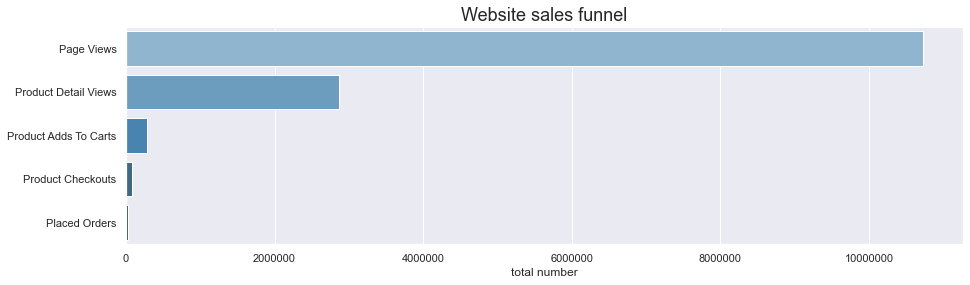

In [401]:
f, ax= plt.subplots(figsize=(15,4))
ax = sns.barplot(y=['Page Views','Product Detail Views', 'Product Adds To Carts', 'Product Checkouts', 'Placed Orders'],
            x=[dfq1['page_views'].sum() ,dfq1['product_detail_views'].sum(), dfq1['product_adds_to_carts'].sum(), dfq1['product_checkouts'].sum(), dfq1['order_count'].sum()],
            palette="Blues_d")
ax.set_title('Website sales funnel', fontsize=18)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('total number')
plt.show()

In [402]:
#build a dataframe
page_views = dfq1['page_views'].sum()
product_detail_views = dfq1['product_detail_views'].sum()
product_adds_to_carts = dfq1['product_adds_to_carts'].sum()
product_checkouts = dfq1['product_checkouts'].sum()
order_count = dfq1['order_count'].sum()

In [403]:
dat = {'Page_Views':page_views,
      'Product_Detail_Views': product_detail_views,
      'Product_Adds_To_Carts': product_adds_to_carts,
      'Product_Checkouts': product_checkouts,
      'Placed_Orders': order_count}


In [404]:
con = pd.DataFrame(data=dat,index=['total_number']).transpose()

In [405]:
con.head()

,total_number
Page_Views,10729488
Product_Detail_Views,2869270
Product_Adds_To_Carts,289106
Product_Checkouts,84452
Placed_Orders,20879


In [406]:
#website conversion funnel
con['lag_number'] = con['total_number'].shift(periods=1)#每个阶段对应上一个阶段的订单数量
con['conversion_rate_based_on_last_step'] = con['total_number']/con['lag_number']
con.drop('lag_number', axis=1, inplace=True)
con['conversion_rate_based_on_page_views'] = con['total_number']/page_views

In [407]:
con

,total_number,conversion_rate_based_on_last_step,conversion_rate_based_on_page_views
Page_Views,10729488,NaN,1.0000000000
Product_Detail_Views,2869270,0.2674190977,0.2674190977
Product_Adds_To_Carts,289106,0.1007594266,0.0269449950
Product_Checkouts,84452,0.2921143110,0.0078710186
Placed_Orders,20879,0.2472291953,0.0019459456


The overall conversion rate from page_views to final placed_orders is only 0.19%:
- The conversion rate from page_views to product_detail_views is 26.7%. 
- The conversion rate from product_detail_view to product_adds_to_carts is 10.1%, which is the lowest.
- The conversion rate from product_adds_to_carts to product_checkouts is 29.2%.
- The conversion rate from product_checkouts to final placed_orders is 24.7%.

### Is there any correlation between the orders and the website traffic?
#### 1) correlation matrix

In [408]:
corr = dfq1[['page_views','sessions','product_detail_views','avg_session_in_s','order_count']].corr()
corr

,page_views,sessions,product_detail_views,avg_session_in_s,order_count
page_views,1.0000000000,0.9890813708,0.9848758001,0.1501816806,0.8158091864
sessions,0.9890813708,1.0000000000,0.9594380746,0.0708715322,0.7703437791
product_detail_views,0.9848758001,0.9594380746,1.0000000000,0.1739664715,0.8288465594
avg_session_in_s,0.1501816806,0.0708715322,0.1739664715,1.0000000000,0.2612924678
order_count,0.8158091864,0.7703437791,0.8288465594,0.2612924678,1.0000000000


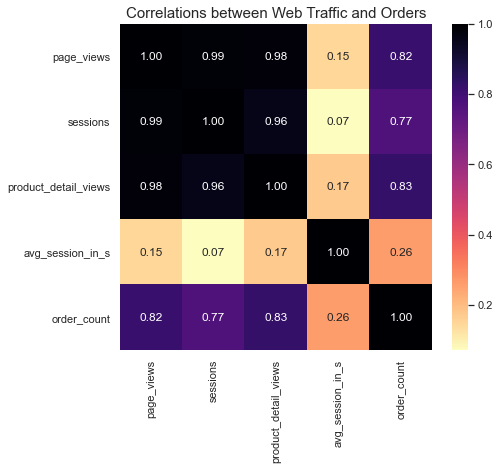

In [409]:
plt.figure(figsize=(7,6))
ax = sns.heatmap(corr,annot=True, fmt='.2f', cmap='magma_r') # PuBu, coolwarm 
ax.set_title('Correlations between Web Traffic and Orders',fontsize=15)
# plt.title('Correlations between Traffic and Orders',fontsize=15)
plt.show()

The result shows a strong positive correlation between page_views, and the number of orders, coefficient is 0.82. 

Also, there is a strong positive correlation between sessions, product_detail_views and the number of orders. 

Therefore, we conclude that the website traffic has a significant correlation to the number of orders.

### 2) data visualization

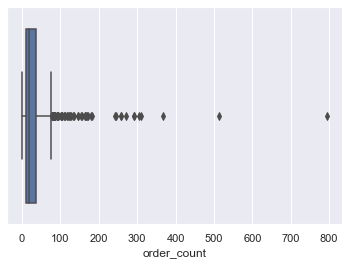

In [410]:
# check outlier of order_count
sns.boxplot(dfq1['order_count'])
plt.show()

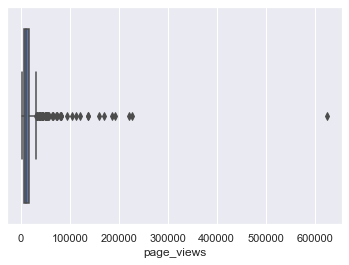

In [411]:
# check outlier of page_views
sns.boxplot(dfq1['page_views'])
plt.show()

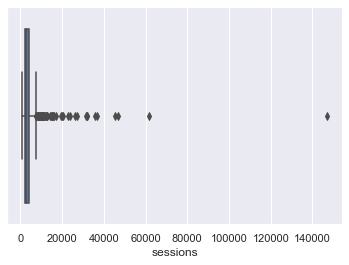

In [412]:
# check outlier of sessions
sns.boxplot(dfq1['sessions'])
plt.show()

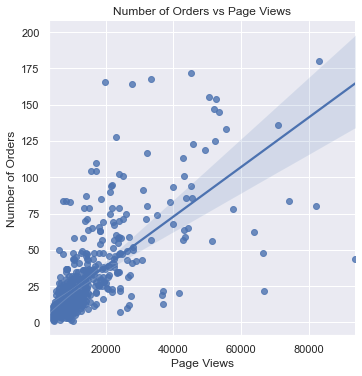

In [413]:
# select order_count that is less than 200
ax = sns.lmplot(x='page_views', y='order_count',data=dfq1[dfq1['order_count'] < 200][dfq1['page_views'] < 100000])
ax.set(xlabel='Page Views', ylabel='Number of Orders', title='Number of Orders vs Page Views')
# plt.title('Linear Regression between Page Views and the Number of Orders')
plt.show()

From the scatter plot, we didn't see a strong linear relationship between page views and the number of orders.

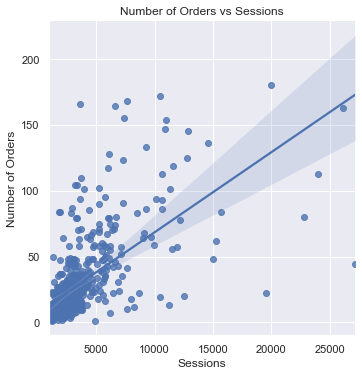

In [414]:
ax = sns.lmplot(x='sessions', y='order_count',data=dfq1[dfq1['order_count'] < 200][dfq1['sessions'] < 30000])
ax.set(xlabel='Sessions', ylabel='Number of Orders', title='Number of Orders vs Sessions')
plt.show()

From the scatter plot, we didn't see a strong linear relationship between the number of sessions and the number of orders.

### 3) regression

In [415]:
from sklearn.linear_model import LinearRegression
x_pageviews = dfq1['page_views'].values.reshape(-1,1) #转换成array带入模型
y_ordercount = dfq1['order_count'].values.reshape(-1,1)

In [416]:
lm_pg_order = LinearRegression().fit(x_pageviews, y_ordercount)
r_sq_pg = lm_pg_order.score(x_pageviews, y_ordercount)
print('coefficient of determination:', r_sq_pg)

coefficient of determination: 0.6655446286745209


### 3.3 How’s the trend of website traffic and the number of orders over time?

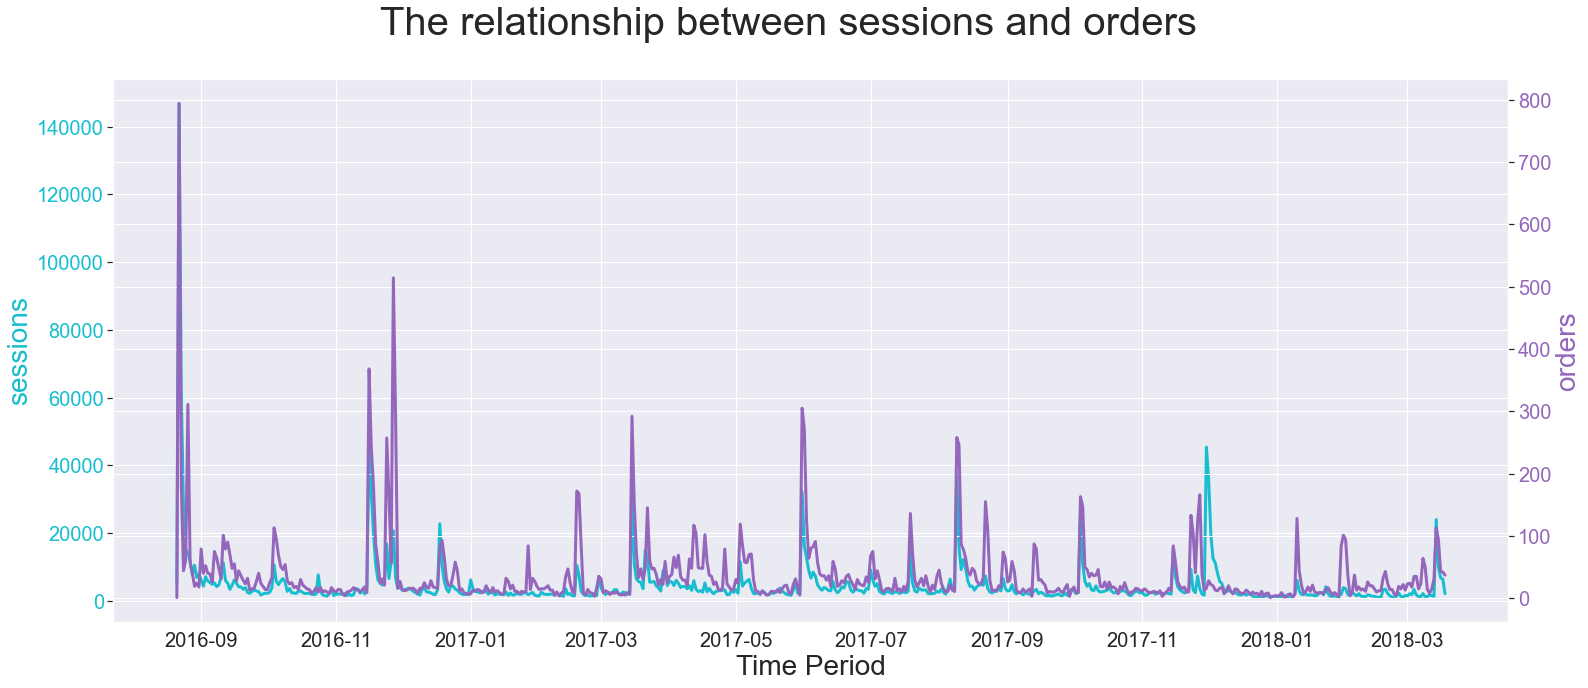

In [417]:
fig, ax1 = plt.subplots(figsize=(25,10))
fig.suptitle('The relationship between sessions and orders', fontsize=40)
color = 'tab:cyan'
ax1.set_xlabel('Time Period', fontsize=28)
ax1.set_ylabel('sessions', color = color, fontsize=28)
ax1.plot(dfq1['date_day'], dfq1['sessions'], color = color, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(size=20)
plt.yticks(size=20)

ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('orders', color=color, fontsize=28)
ax2.plot(dfq1['date_day'], dfq1['order_count'], color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)
plt.xticks(size=20)
plt.yticks(size=20)
# plt.grid(True)

#fig.tight_layout()
plt.show()

From the plot, we can see the trend of the number of orders is highly related to the sessions.

From August 2016 to March 2018, the traffic and the number of orders are decreasing in the long term.

The trend of orders and traffic fluctuated with seasons and holidays. For example, there is a peak during the Thanksgiving holidays. The traffic and orders are higher during the August than January.

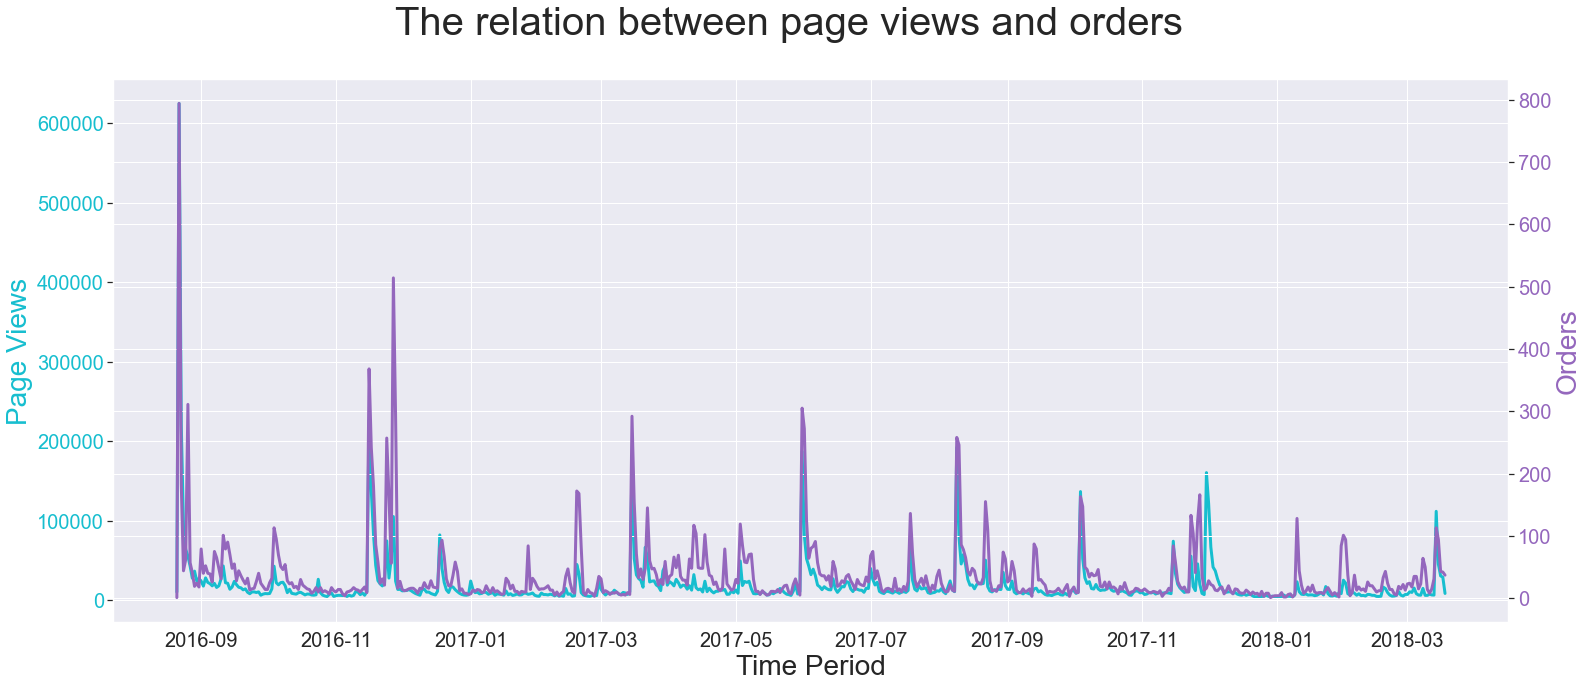

In [418]:
fig, ax1 = plt.subplots(figsize=(25,10))
fig.suptitle('The relation between page views and orders', fontsize=40)
color = 'tab:cyan'
ax1.set_xlabel('Time Period', fontsize=28)
ax1.set_ylabel('Page Views', color=color, fontsize=28)
ax1.plot(dfq1['date_day'], dfq1['page_views'], color=color, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

plt.xticks(size=20)
plt.yticks(size=20)

ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Orders', color=color, fontsize=28)
ax2.plot(dfq1['date_day'], dfq1['order_count'], color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)
plt.yticks(size=20)

plt.show()

From the plot, we can see the trend of the number of orders is highly related to the page views.

From August 2016 to March 2018, the traffic and the number of orders are decreasing in the long term.

The trend of orders and traffic fluctuated with seasons and holidays. For example, there is a peak during the Thanksgiving holidays. The traffic and orders are higher during the August than January.

### Part 4: Sales trend analysis

2. How’s the sales from the different products over the seasons or months? What are the popular products? Is there any correlation between different products?


In [419]:
df4_1 = pd.merge(left=orders_items, right=products, how='left', on='product_id')
df4_2 = pd.merge(left=df4_1, right=orders, how='left', on='order_id')
df4_2['order_item_sale'] = df4_2['price']*df4_2['quantity']
df4_3 = pd.merge(left=df4_2, right=transactions, how='left', on='order_id')

In [420]:
dfq4 = df4_3[(df4_3['fulfillment_status_x'] == 'fulfilled') & (df4_3['status'] == 'success')]

In [421]:
dfq4['month_year'] = dfq4['order_created_at'].dt.to_period('M')

In [422]:
dfq4.head()

,orders_items_id,order_id,product_id,product_style,variant_id,sku,product_title,fulfillment_status_x,price,quantity,title,product_type,product_create_at,product_published_at,order_created_at,order_closed_at,cancelled_at,customer_id,financial_status,fulfillment_status_y,processed_at,total_price,shipping_rate,subtotal_price,total_discounts,total_line_items_price,order_item_sale,transaction_id,parent_id,amount,error_code,kind,status,transaction_created_at,month_year
7,13327495903,7676539359,12927625695.0,08ba660ec5643520a73108bef6f3ddd6,50547001887,0503dec809a8a2600d9acc5249900ecb,27d598cb953eff3667f7d051fe795284,fulfilled,25.0,1,27d598cb953eff3667f7d051fe795284,Shirts,2016-08-18,2018-02-05,2016-08-22,2016-08-22,NaN,8686915935.0,paid,fulfilled,2016-08-22,131.10,0.0,120.0,0.0,120.0,25.0,8331919391.0,NaN,131.10,NaN,authorization,success,2016-08-21,2016-08
8,13327495903,7676539359,12927625695.0,08ba660ec5643520a73108bef6f3ddd6,50547001887,0503dec809a8a2600d9acc5249900ecb,27d598cb953eff3667f7d051fe795284,fulfilled,25.0,1,27d598cb953eff3667f7d051fe795284,Shirts,2016-08-18,2018-02-05,2016-08-22,2016-08-22,NaN,8686915935.0,paid,fulfilled,2016-08-22,131.10,0.0,120.0,0.0,120.0,25.0,8333205471.0,8331919391.0,131.10,NaN,capture,success,2016-08-22,2016-08
9,13327518751,7676549855,12927690655.0,68ac90e5df73ae9b662174b21dc1586f,50548035807,38de0d087208588510907b5c2d149e4b,07dd8ba2ccadf3f3766750f10f6d05b5,fulfilled,25.0,1,07dd8ba2ccadf3f3766750f10f6d05b5,Shirts,2016-08-18,NaN,2016-08-22,2016-08-22,NaN,8686924319.0,paid,fulfilled,2016-08-22,91.12,7.0,77.0,0.0,77.0,25.0,8331930399.0,NaN,91.12,NaN,authorization,success,2016-08-21,2016-08
10,13327518751,7676549855,12927690655.0,68ac90e5df73ae9b662174b21dc1586f,50548035807,38de0d087208588510907b5c2d149e4b,07dd8ba2ccadf3f3766750f10f6d05b5,fulfilled,25.0,1,07dd8ba2ccadf3f3766750f10f6d05b5,Shirts,2016-08-18,NaN,2016-08-22,2016-08-22,NaN,8686924319.0,paid,fulfilled,2016-08-22,91.12,7.0,77.0,0.0,77.0,25.0,8333205599.0,8331930399.0,91.12,NaN,capture,success,2016-08-22,2016-08
11,13327526495,7676553055,12950530079.0,8945e6be376ffa754e06840e4865cc24,50766799839,2931fc65c83f771a597527925ff97131,08bbf9d4710e8bdbfd07c763ecb2f9e3,fulfilled,68.0,1,08bbf9d4710e8bdbfd07c763ecb2f9e3,Jumpsuit,2016-08-21,NaN,2016-08-22,2016-08-22,NaN,8687041311.0,paid,fulfilled,2016-08-22,75.00,7.0,68.0,0.0,68.0,68.0,8331934431.0,NaN,75.00,NaN,authorization,success,2016-08-21,2016-08


In [423]:
dfq4.drop_duplicates('orders_items_id',inplace=True)

In [424]:
dfq4.reset_index(drop=True,inplace=True)

#### 4.1 Total sales trend

In [425]:
df4_4 = dfq4[['order_created_at','order_item_sale']].groupby('order_created_at').sum()

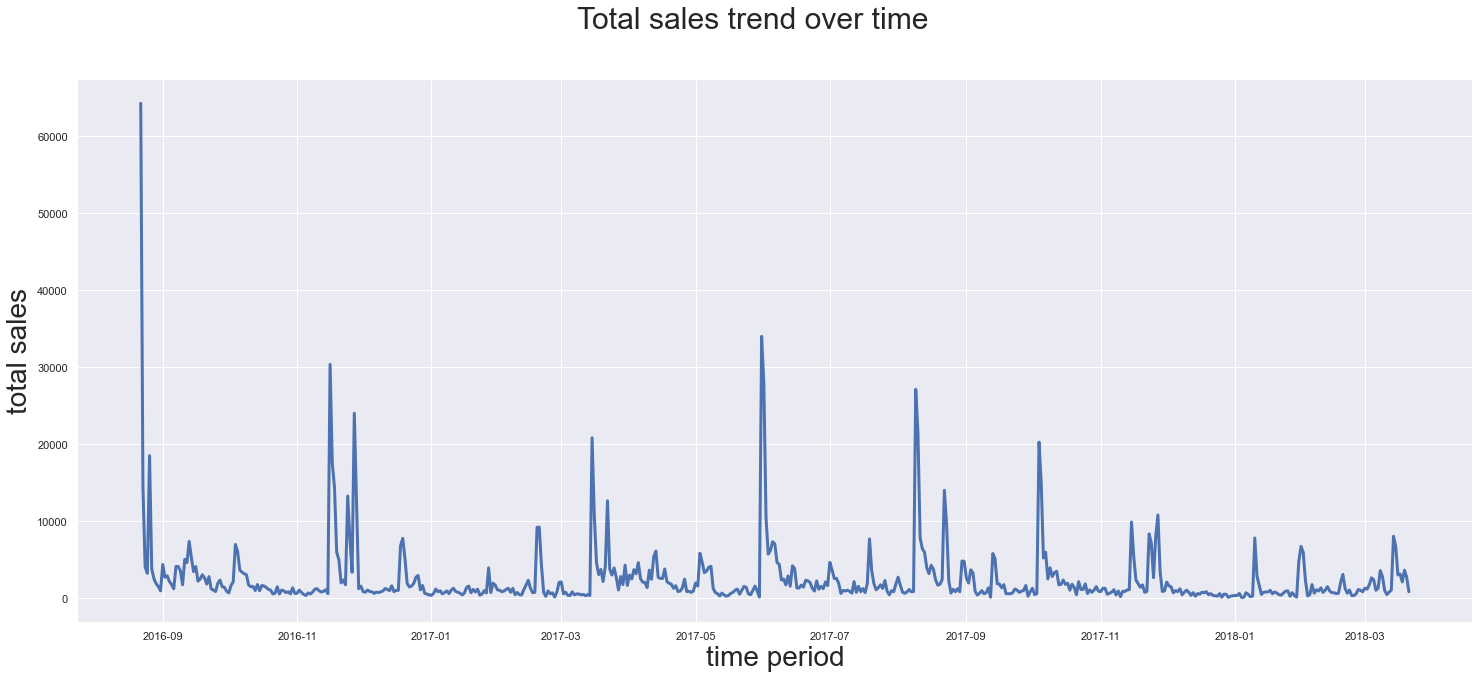

In [426]:
fig, ax1 = plt.subplots(figsize=(25,10))
fig.suptitle('Total sales trend over time', fontsize=30)
ax1.set_xlabel('time period', fontsize=28)
ax1.set_ylabel('total sales', fontsize=28)
ax1.plot(df4_4.index, df4_4['order_item_sale'], linewidth=3)
ax1.tick_params(axis='y')

The sale is highest at the first month 2016-08.

At the second month, the sale droped sharply.

After the second month, the sales went smoothly and fluctuated with the seasons and holidays.

In [427]:
df4_4 = dfq4[['month_year','order_item_sale']].groupby('month_year').sum()

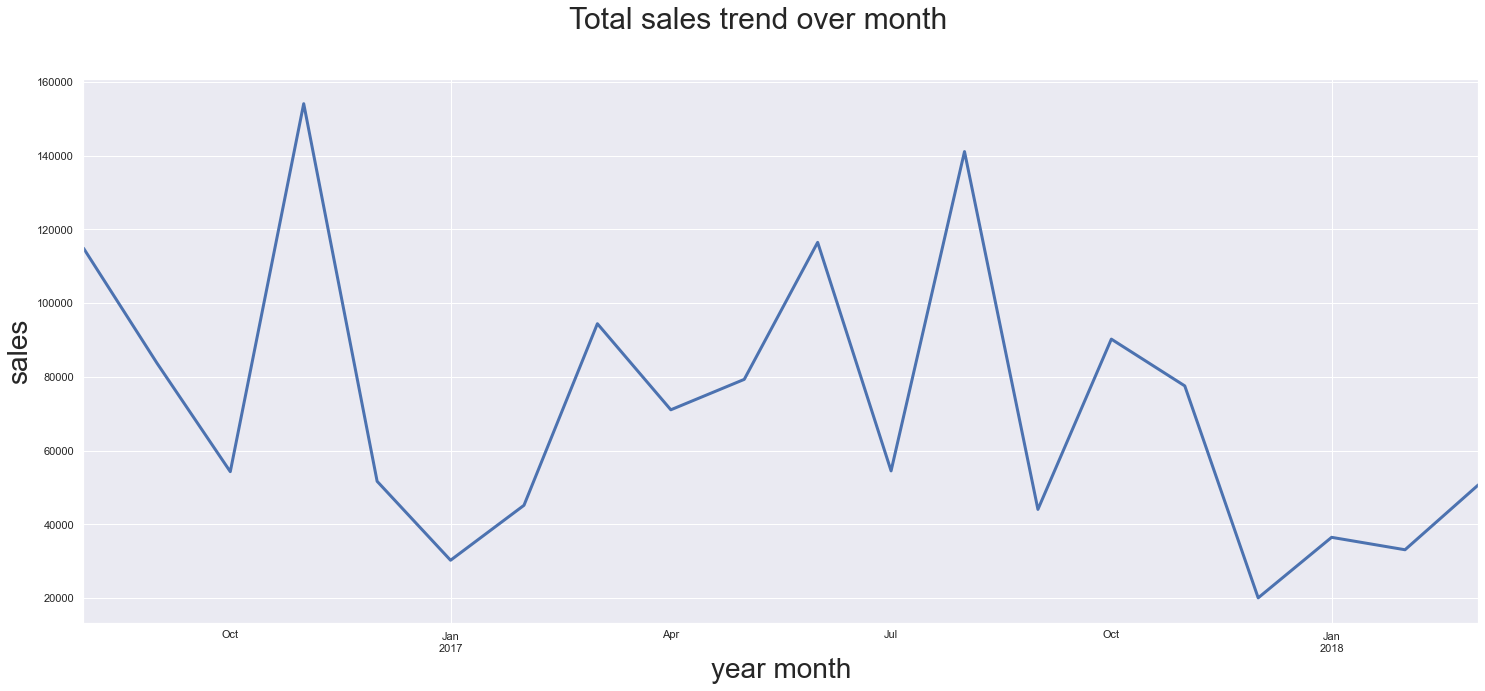

In [428]:
fig, ax1 = plt.subplots(figsize=(25,10))
df4_4['order_item_sale'].plot(ax=ax1, linewidth=3)
fig.suptitle('Total sales trend over month', fontsize=30)
ax1.set_xlabel('year month', fontsize=28)
ax1.set_ylabel('sales', fontsize=28)
plt.show()

In the long term, the sales are decreasing from August 2016 to March 2018.

The sales fluctuated with seasons and holidays. For example, the sales are higher during summer than winter (except Nov.)

#### 4.2 Sales from different products

In [429]:
df4_5 = dfq4.groupby(['order_created_at', 'product_type']).agg('sum')['order_item_sale']

In [430]:
df4_6 = df4_5.unstack('order_created_at').transpose()

In [431]:
df4_6.head()


product_type,Blazer,Blouse,Bodysuit,Bomber,Cardigan,Dress,Gift Card,Hoodie,Jacket,Jumpsuit,Pants,Pullover,Shirts,Shorts,Skirt,Sweater,TANK,Top,Trousers,Tunic,crop top,maxi,midi,mini,romper
order_created_at,,,,,,,,,,,,,,,,,,,,,,,,,
2016-08-22,4859.0,4424.0,1216.0,3634.0,1863.0,5038.0,NaN,5670.0,1674.0,5712.0,NaN,3612.0,5900.0,NaN,3362.0,1798.0,NaN,3380.0,5357.0,6755.0,NaN,NaN,NaN,NaN,NaN
2016-08-23,1271.0,648.0,256.0,2370.0,NaN,1758.0,NaN,45.0,930.0,680.0,NaN,630.0,350.0,NaN,634.0,986.0,NaN,814.0,1654.0,1435.0,NaN,NaN,NaN,NaN,NaN
2016-08-24,402.0,162.0,64.0,395.0,NaN,272.0,NaN,NaN,744.0,408.0,NaN,168.0,NaN,NaN,241.0,406.0,NaN,128.0,502.0,140.0,NaN,NaN,NaN,NaN,NaN
2016-08-25,334.0,272.0,32.0,158.0,NaN,468.0,NaN,450.0,124.0,136.0,NaN,168.0,475.0,NaN,45.0,116.0,NaN,NaN,90.0,315.0,NaN,NaN,NaN,NaN,NaN
2016-08-26,1064.0,324.0,192.0,395.0,69.0,386.0,NaN,3240.0,310.0,884.0,NaN,1260.0,3625.0,NaN,747.0,348.0,NaN,792.0,2041.0,2800.0,NaN,NaN,NaN,NaN,NaN


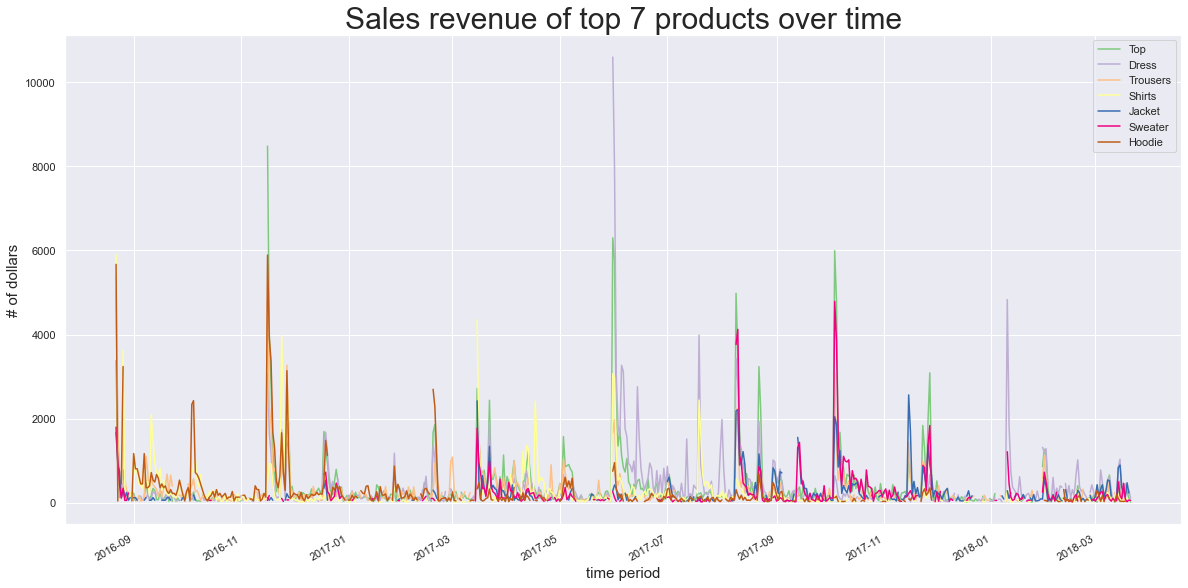

In [432]:
column = ['Top', 'Dress', 'Trousers', 'Shirts', 'Jacket', 'Sweater', 'Hoodie']
cmap = sns.color_palette("Accent")

fig, ax1 = plt.subplots(figsize=(20,10))
df4_6[column].plot(color=cmap,ax=ax1)
ax1.set_xlabel('time period', fontsize=15)
ax1.set_ylabel('# of dollars', fontsize=15)
ax1.set_title('Sales revenue of top 7 products over time', fontsize=30)
ax1.legend(bbox_to_anchor=(1, 1))
plt.show()

In [433]:
df4_7 = dfq4.groupby(['order_created_at', 'product_type']).agg('sum')['quantity']
df4_8 = df4_7.unstack('order_created_at').transpose()

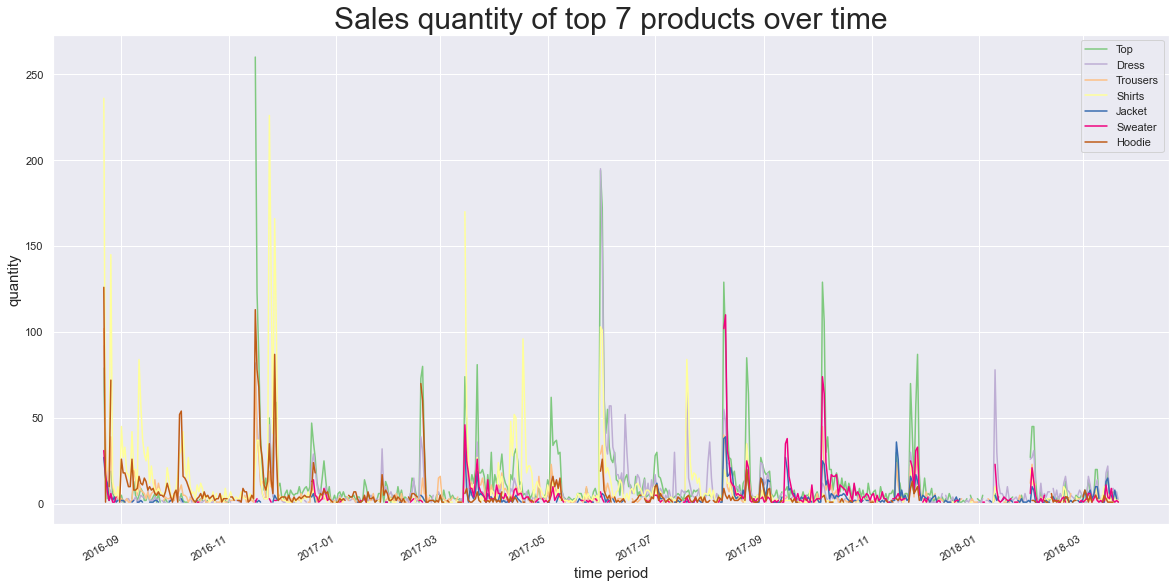

In [434]:
column = ['Top', 'Dress', 'Trousers', 'Shirts', 'Jacket', 'Sweater', 'Hoodie']
cmap = sns.color_palette("Accent")

fig, ax1 = plt.subplots(figsize=(20,10))
df4_8[column].plot(color=cmap,ax=ax1)
ax1.set_xlabel('time period', fontsize=15)
ax1.set_ylabel('quantity', fontsize=15)
ax1.set_title('Sales quantity of top 7 products over time', fontsize=30)
ax1.legend(bbox_to_anchor=(1, 1))
plt.show()

In [435]:
df4_9 = dfq4.groupby(['month_year', 'product_type']).agg('sum')['order_item_sale']
df4_10 = df4_9.unstack('month_year').transpose()

In [436]:
df4_10.head()

product_type,Blazer,Blouse,Bodysuit,Bomber,Cardigan,Dress,Gift Card,Hoodie,Jacket,Jumpsuit,Pants,Pullover,Shirts,Shorts,Skirt,Sweater,TANK,Top,Trousers,Tunic,crop top,maxi,midi,mini,romper
month_year,,,,,,,,,,,,,,,,,,,,,,,,,
2016-08,9331.0,6230.0,1952.0,8058.0,1932.0,8716.0,NaN,9450.0,4340.0,7956.0,NaN,6594.0,11250.0,NaN,5628.0,4002.0,NaN,5910.0,11054.0,12495.0,NaN,NaN,NaN,NaN,NaN
2016-09,3216.0,1118.0,768.0,4582.0,7866.0,3670.0,NaN,14085.0,1798.0,1700.0,NaN,2940.0,16225.0,NaN,2223.0,696.0,NaN,3734.0,8977.0,10150.0,NaN,NaN,NaN,NaN,NaN
2016-10,1543.0,388.0,352.0,3081.0,12144.0,1692.0,NaN,11565.0,744.0,476.0,NaN,756.0,7800.0,NaN,851.0,174.0,NaN,1318.0,4907.0,6475.0,NaN,NaN,NaN,NaN,NaN
2016-11,1689.3,1216.6,614.4,8326.3,10536.3,13500.2,NaN,27141.5,1091.2,4120.8,NaN,1629.6,16582.5,NaN,6969.8,686.0,5377.0,25747.2,20979.2,6975.5,NaN,NaN,NaN,NaN,NaN
2016-12,340.0,104.0,96.0,2014.0,2418.0,7894.0,NaN,8392.0,1388.0,1020.0,NaN,126.0,1900.0,NaN,2713.0,3230.0,3109.0,11058.0,5537.0,315.0,NaN,NaN,NaN,NaN,NaN


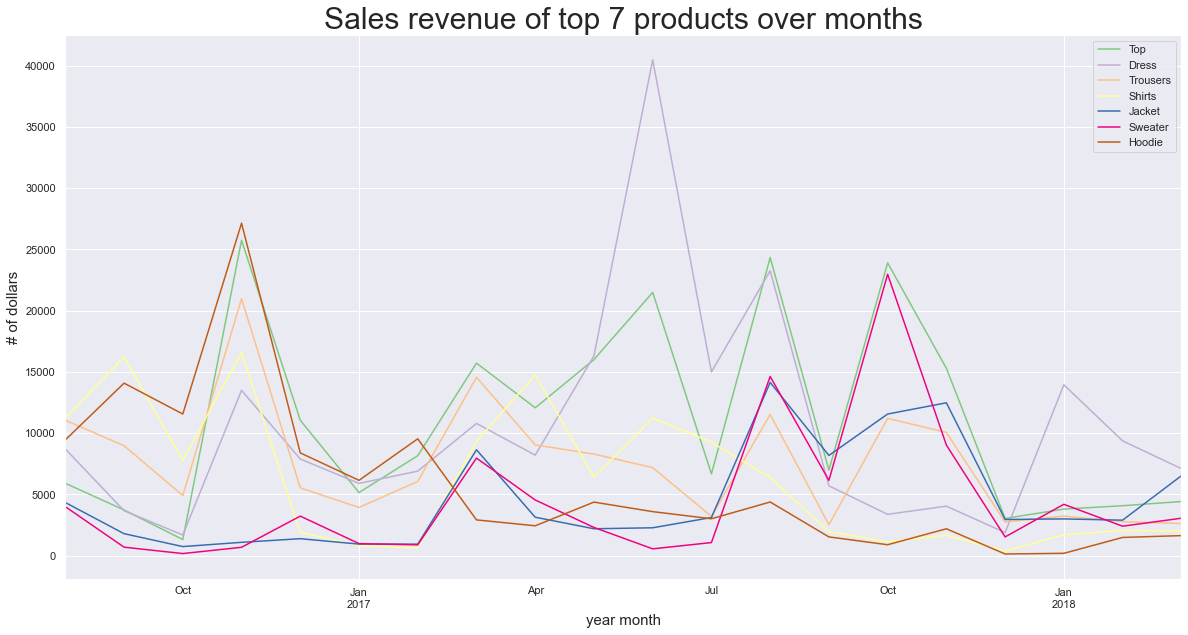

In [437]:
column = ['Top', 'Dress', 'Trousers', 'Shirts', 'Jacket', 'Sweater', 'Hoodie']
cmap = sns.color_palette("Accent")

fig, ax1 = plt.subplots(figsize=(20,10))
df4_10[column].plot(color=cmap,ax=ax1)
ax1.set_xlabel('year month', fontsize=15)
ax1.set_ylabel('# of dollars', fontsize=15)
ax1.set_title('Sales revenue of top 7 products over months', fontsize=30)
ax1.legend(bbox_to_anchor=(1, 1))
plt.show()

The sales revenue of different product type fluctuated seasonly:

- The revenue of Dress reaches highest in the summer (June 2017).
- The revenue of Sweater reaches highest at the beginning of winter (Oct 2017).
- The revenue of Top is higher in the summer and autumn, and lower in the winter.
- The revenue of Trousers is higher in the spring and autumn, and lower in the winter and summer.

In [438]:
df4_11 = dfq4.groupby(['month_year', 'product_type']).agg('sum')['quantity']
df4_12 = df4_11.unstack('month_year').transpose()

In [439]:
df4_12.head()

product_type,Blazer,Blouse,Bodysuit,Bomber,Cardigan,Dress,Gift Card,Hoodie,Jacket,Jumpsuit,Pants,Pullover,Shirts,Shorts,Skirt,Sweater,TANK,Top,Trousers,Tunic,crop top,maxi,midi,mini,romper
month_year,,,,,,,,,,,,,,,,,,,,,,,,,
2016-08,140.0,113.0,61.0,102.0,28.0,159.0,NaN,210.0,70.0,117.0,NaN,157.0,450.0,NaN,116.0,69.0,NaN,136.0,213.0,357.0,NaN,NaN,NaN,NaN,NaN
2016-09,48.0,20.0,24.0,58.0,114.0,67.0,NaN,313.0,29.0,25.0,NaN,70.0,649.0,NaN,48.0,12.0,NaN,92.0,168.0,290.0,NaN,NaN,NaN,NaN,NaN
2016-10,23.0,7.0,11.0,39.0,176.0,31.0,NaN,257.0,12.0,7.0,NaN,18.0,312.0,NaN,18.0,3.0,NaN,31.0,92.0,185.0,NaN,NaN,NaN,NaN,NaN
2016-11,30.0,25.0,24.0,123.0,183.0,352.0,NaN,576.0,20.0,66.0,NaN,46.0,861.0,NaN,158.0,15.0,283.0,787.0,368.0,229.0,NaN,NaN,NaN,NaN,NaN
2016-12,5.0,2.0,3.0,27.0,34.0,143.0,NaN,149.0,16.0,15.0,NaN,3.0,76.0,NaN,59.0,62.0,139.0,325.0,87.0,9.0,NaN,NaN,NaN,NaN,NaN


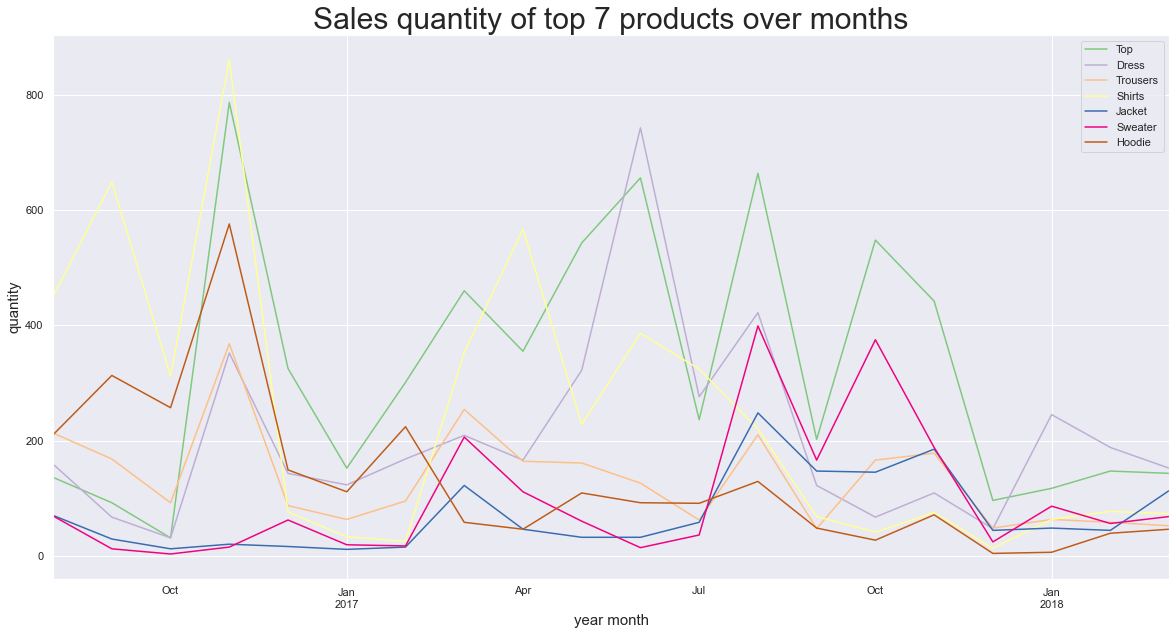

In [440]:
column = ['Top', 'Dress', 'Trousers', 'Shirts', 'Jacket', 'Sweater', 'Hoodie']
cmap = sns.color_palette("Accent")

fig, ax1 = plt.subplots(figsize=(20,10))
df4_12[column].plot(color=cmap,ax=ax1)
ax1.set_xlabel('year month', fontsize=15)
ax1.set_ylabel('quantity', fontsize=15)
ax1.set_title('Sales quantity of top 7 products over months', fontsize=30)
ax1.legend(bbox_to_anchor=(1, 1))
plt.show()

The sales quantity of different product type fluctuated seasonly:

- The Top product is the best seller in terms of quantity. The quantity is higher in the summer and autumn, and lower in the winter.
- The quantity of Dress is highest in the summer, especially in June.
- The quantity of Sweater is highest in the autumn.
- The quantity of Shirts is lowest in the winter.

### Part 5: Product bucket analysis

##### Any correlation between different products?

In [441]:
order_item1 = orders_items[orders_items.fulfillment_status == 'fulfilled']
order_item2 = orders_items[orders_items.fulfillment_status == 'fulfilled']

In [442]:
#self-join to get whether the products buy in package
df5_1 = pd.merge(left=order_item1, right=order_item2, how='inner', on='order_id')
df5_2 = df5_1[df5_1.product_id_x != df5_1.product_id_y]
df5_2.head()

,orders_items_id_x,order_id,product_id_x,product_style_x,variant_id_x,sku_x,product_title_x,fulfillment_status_x,price_x,quantity_x,orders_items_id_y,product_id_y,product_style_y,variant_id_y,sku_y,product_title_y,fulfillment_status_y,price_y,quantity_y
1,13327495903,7676539359,12927625695.0,08ba660ec5643520a73108bef6f3ddd6,50547001887,0503dec809a8a2600d9acc5249900ecb,27d598cb953eff3667f7d051fe795284,fulfilled,25.0,1,13327495967,12927690655.0,68ac90e5df73ae9b662174b21dc1586f,50548035935,0871fce3fac653a5b430adf1eeb66242,07dd8ba2ccadf3f3766750f10f6d05b5,fulfilled,25.0,1
2,13327495903,7676539359,12927625695.0,08ba660ec5643520a73108bef6f3ddd6,50547001887,0503dec809a8a2600d9acc5249900ecb,27d598cb953eff3667f7d051fe795284,fulfilled,25.0,1,13327496031,12927632799.0,6056dc7fb0e6987bfb6d08a8a707446f,50547135583,2d72be39ffac72ed072005b2a546c4ea,d57bc87aca919b4758da6974cdf607fa,fulfilled,45.0,1
4,13327495967,7676539359,12927690655.0,68ac90e5df73ae9b662174b21dc1586f,50548035935,0871fce3fac653a5b430adf1eeb66242,07dd8ba2ccadf3f3766750f10f6d05b5,fulfilled,25.0,1,13327495903,12927625695.0,08ba660ec5643520a73108bef6f3ddd6,50547001887,0503dec809a8a2600d9acc5249900ecb,27d598cb953eff3667f7d051fe795284,fulfilled,25.0,1
6,13327495967,7676539359,12927690655.0,68ac90e5df73ae9b662174b21dc1586f,50548035935,0871fce3fac653a5b430adf1eeb66242,07dd8ba2ccadf3f3766750f10f6d05b5,fulfilled,25.0,1,13327496031,12927632799.0,6056dc7fb0e6987bfb6d08a8a707446f,50547135583,2d72be39ffac72ed072005b2a546c4ea,d57bc87aca919b4758da6974cdf607fa,fulfilled,45.0,1
7,13327495967,7676539359,12927690655.0,68ac90e5df73ae9b662174b21dc1586f,50548035935,0871fce3fac653a5b430adf1eeb66242,07dd8ba2ccadf3f3766750f10f6d05b5,fulfilled,25.0,1,13327496095,12927625695.0,08ba660ec5643520a73108bef6f3ddd6,50547004383,878cddb2f377e2787dea8075d3f56954,27d598cb953eff3667f7d051fe795284,fulfilled,25.0,1


In [443]:
df_purchased_together = df5_2[['product_id_x', 'product_id_y', 'orders_items_id_x']].groupby(['product_id_x', 'product_id_y']).agg('count')
df_purchased_together = df_purchased_together.rename(columns={'orders_items_id_x':'purchased_counts'})
df_purchased_together.reset_index(level=['product_id_x','product_id_y'],inplace=True)
df_purchased_together = df_purchased_together.rename(columns={'product_id_x':'product_id', 'product_id_y':'product_id_purchased_together'})
df_purchased_together.head()

,product_id,product_id_purchased_together,purchased_counts
0,12927625695.0,12927629215.0,95
1,12927625695.0,12927630431.0,17
2,12927625695.0,12927632095.0,26
3,12927625695.0,12927632799.0,75
4,12927625695.0,12927633311.0,9


In [444]:
df_orders = order_item1[['product_id', 'orders_items_id']].groupby(['product_id']).agg('count')
df_orders = df_orders.rename(columns={'orders_items_id':'num_orders'})
df_orders.reset_index(level='product_id',inplace=True)
df_orders.head()

,product_id,num_orders
0,12927625695.0,930
1,12927629215.0,1064
2,12927630431.0,134
3,12927632095.0,428
4,12927632799.0,1066


In [445]:
purchased = pd.merge(left=df_purchased_together, right=df_orders, how='left', on='product_id')
purchased.head()

,product_id,product_id_purchased_together,purchased_counts,num_orders
0,12927625695.0,12927629215.0,95,930
1,12927625695.0,12927630431.0,17,930
2,12927625695.0,12927632095.0,26,930
3,12927625695.0,12927632799.0,75,930
4,12927625695.0,12927633311.0,9,930


In [446]:
purchased['percentage_purchased_together'] = purchased.purchased_counts/purchased.num_orders
pd.set_option('display.precision',10)
purchased.sort_values(by='percentage_purchased_together', ascending=False).head()

,product_id,product_id_purchased_together,purchased_counts,num_orders,percentage_purchased_together
14294,1183022257661.0,1183021831677.0,2,2,1.0000000000
14297,1183022257661.0,1183022159357.0,2,2,1.0000000000
14332,1183022388733.0,1183022454269.0,4,5,0.8000000000
14091,1007444137469.0,1007444071933.0,18,23,0.7826086957
5861,521264076285.0,521264043517.0,209,299,0.6989966555


In [447]:
# select number of orders that is higher than 20
purchased[purchased['num_orders']>20].sort_values(by='percentage_purchased_together', ascending=False).head(10)
# order by percentage_purchased_together

,product_id,product_id_purchased_together,purchased_counts,num_orders,percentage_purchased_together
14091,1007444137469.0,1007444071933.0,18,23,0.7826086957
5861,521264076285.0,521264043517.0,209,299,0.6989966555
10047,850182018557.0,850181953021.0,46,67,0.6865671642
14067,1007444071933.0,1007444137469.0,18,28,0.6428571429
10823,850182444541.0,850182411773.0,38,61,0.6229508197
13646,1007443547645.0,1007443580413.0,35,57,0.6140350877
3993,408409839101.0,408409773565.0,72,123,0.5853658537
3897,408409773565.0,408409839101.0,72,123,0.5853658537
12821,933949445629.0,933949543933.0,15,26,0.5769230769
11650,850183165437.0,850183198205.0,12,21,0.5714285714


#### Part 6: Promotion analysis

##### 6.1 How’s the sales of different products with discount?

In [448]:
df6_1 = dfq4[dfq4['total_discounts'] != 0][['product_type', 'order_item_sale']].groupby('product_type').agg('sum')
df6_1 = df6_1.rename(columns={'order_item_sale': 'sales_with_discount'})

In [449]:
df6_2 = dfq4[dfq4['total_discounts'] == 0][['product_type', 'order_item_sale']].groupby('product_type').agg('sum')
df6_2 = df6_2.rename(columns={'order_item_sale': 'sales_without_discount'})

In [450]:
df6_3 = pd.merge(df6_1, df6_2, on='product_type' )

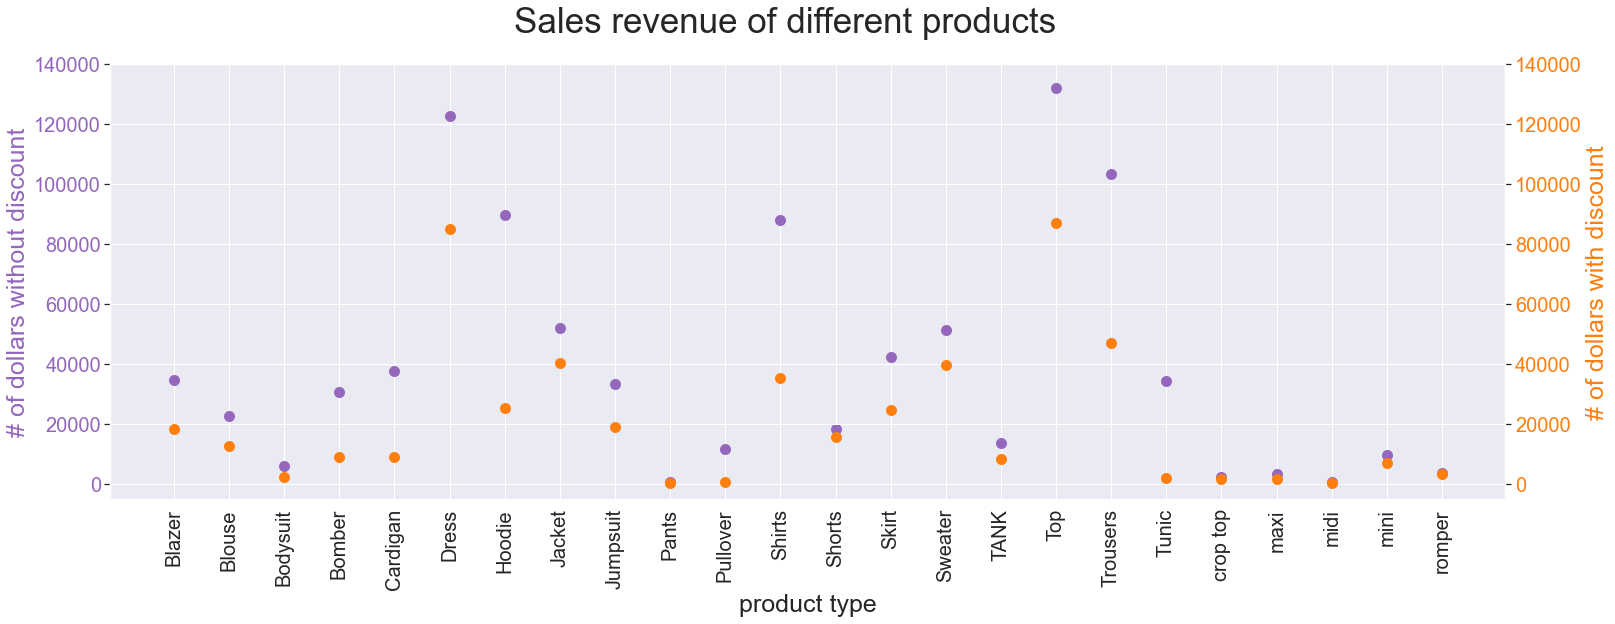

In [451]:
fig, ax1 = plt.subplots(figsize=(25,8))
fig.suptitle('Sales revenue of different products', fontsize=35)
color1 = 'tab:purple'
plt.scatter(df6_3.index,df6_3['sales_without_discount'], color=color1, linewidth=5)
plt.ylabel('# of dollars without discount', fontsize=25, color=color1)
plt.xlabel('product type', fontsize=25)
ax1.tick_params(axis='y',labelcolor=color1)
ax1.set_ylim(-5000,140000)
plt.xticks(size=20,rotation=90)
plt.yticks(size=20)

ax2 = ax1.twinx()
color2 = 'tab:orange'
plt.scatter(df6_3.index, df6_3['sales_with_discount'], color=color2, linewidth=5)
plt.ylabel('# of dollars with discount', fontsize=25, color=color2)
ax2.tick_params(axis='y',labelcolor=color2)
ax2.set_ylim(-5000,140000)
plt.yticks(size=20)
plt.show()


In [452]:
df6_4 = dfq4[dfq4['total_discounts'] != 0][['product_type', 'quantity']].groupby('product_type').agg('sum')
df6_4 = df6_4.rename(columns={'quantity': 'quantity_with_discount'})

In [453]:
df6_5 = dfq4[dfq4['total_discounts'] == 0][['product_type', 'quantity']].groupby('product_type').agg('sum')
df6_5 = df6_5.rename(columns={'quantity': 'quantity_without_discount'})

In [454]:
df6_6 = pd.merge(df6_4, df6_5, on='product_type' )

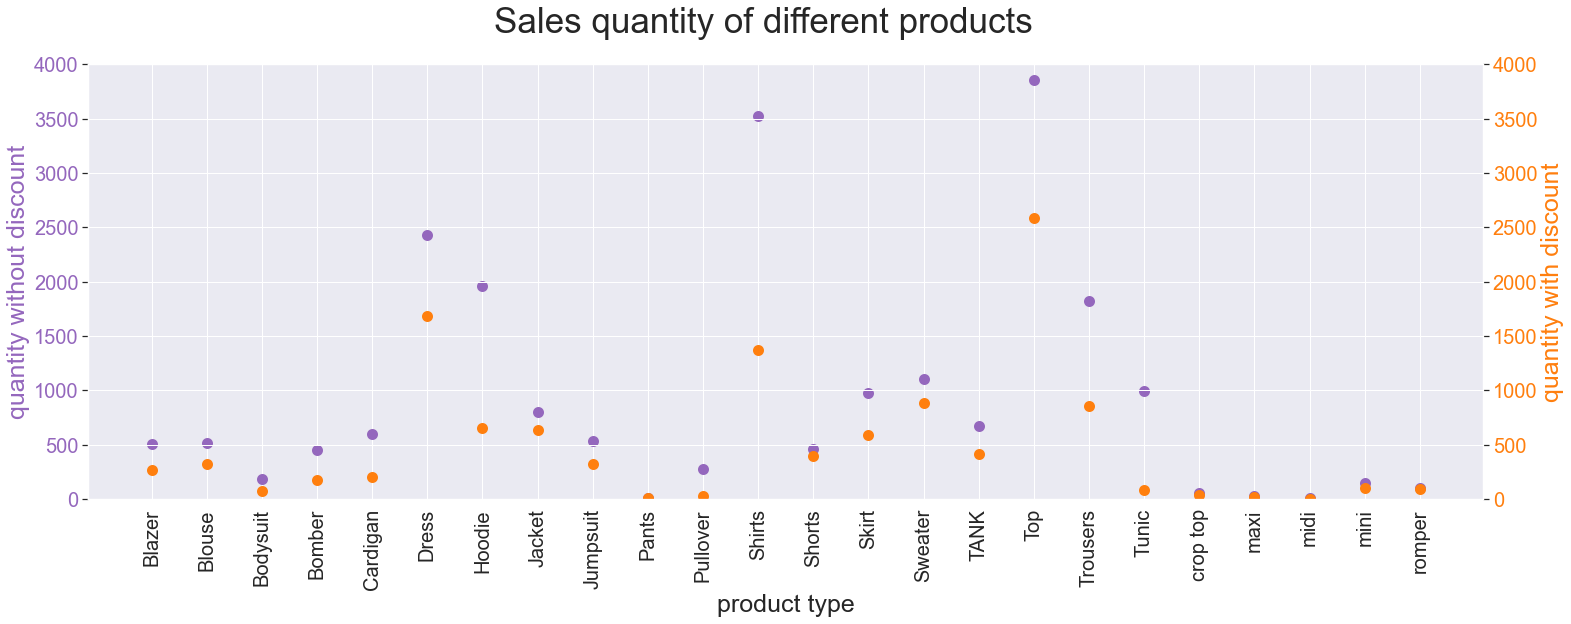

In [455]:
fig, ax1 = plt.subplots(figsize=(25,8))
fig.suptitle('Sales quantity of different products', fontsize=35)
color1 = 'tab:purple'
plt.scatter(df6_6.index,df6_6['quantity_without_discount'], color=color1, linewidth=5)
plt.ylabel('quantity without discount', fontsize=25, color=color1)
plt.xlabel('product type', fontsize=25)
ax1.tick_params(axis='y',labelcolor=color1)
ax1.set_ylim(0,4000)
plt.xticks(size=20,rotation=90)
plt.yticks(size=20)

ax2 = ax1.twinx()
color2 = 'tab:orange'
plt.scatter(df6_6.index, df6_6['quantity_with_discount'], color=color2, linewidth=5)
plt.ylabel('quantity with discount', fontsize=25, color=color2)
ax2.tick_params(axis='y',labelcolor=color2)
ax2.set_ylim(0,4000)
plt.yticks(size=20)
plt.show()



##### 6.2  Does the discount promote sales?

In [456]:
order_quantity = orders_items[['order_id','quantity']].groupby('order_id').agg('sum').reset_index(level='order_id')


In [457]:
dfq6 = pd.merge(orders, order_quantity, how='left', on='order_id')

In [458]:
dfq6['discount_percentage'] = dfq6['total_discounts']/dfq6['total_line_items_price']

In [459]:
dfq6['discount_orders']=(orders.total_discounts!=0)*1
dfq6['no_discount_orders']=(orders.total_discounts==0)*1
dfq6['total_orders']=1

In [460]:
dfq6['discount_quantity']=(orders.total_discounts!=0)*dfq6['quantity']
dfq6['no_discount_quantity']=(orders.total_discounts==0)*dfq6['quantity']

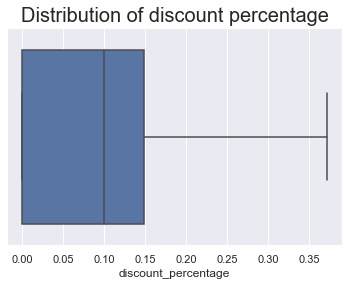

In [461]:
sns.boxplot(dfq6[dfq6['discount_orders']==1]['discount_percentage'],showfliers=False)
plt.title('Distribution of discount percentage', size=20)
plt.show()

In [462]:
dfq6.discount_quantity = dfq6.discount_quantity.astype('float')
dfq6.no_discount_quantity = dfq6.no_discount_quantity.astype('float')

In [463]:
dfq6_1 = dfq6.groupby('order_created_at')['discount_quantity','no_discount_quantity','discount_orders','no_discount_orders','total_orders','discount_percentage'].sum()

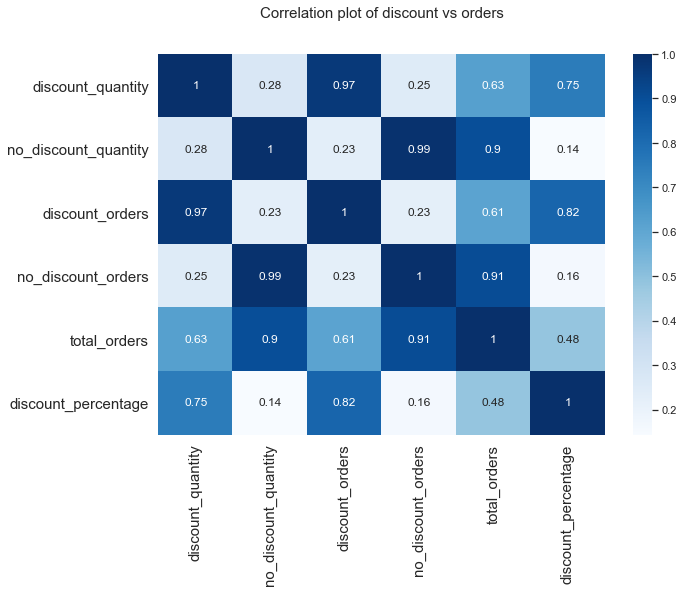

In [464]:
fig, ax = plt.subplots(figsize=(10, 7))
corr_plot = sns.heatmap(dfq6_1.corr(),cmap='Blues',annot=True)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.title("Correlation plot of discount vs orders", fontsize=15,  y=1.08)
plt.show()

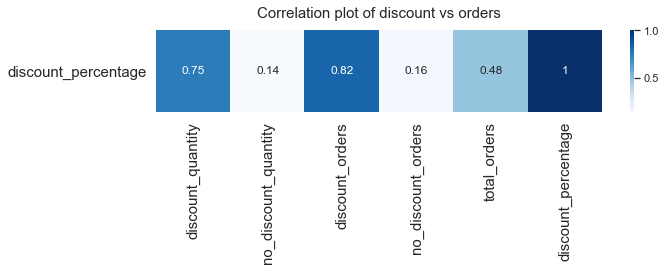

In [465]:
fig, ax = plt.subplots(figsize=(10, 1.5))
corr_plot = sns.heatmap(dfq6_1.corr()[-1:],cmap='Blues',annot=True)
ax.tick_params(axis="x", labelsize=15, rotation=90)
ax.tick_params(axis="y", labelsize=15, rotation=0)
plt.title("Correlation plot of discount vs orders", fontsize=15,  y=1.08)
plt.show()



The correlation coefficient of discount_percentage and discount_quantity is 0.75.

The correlation coefficient of discount_percentage and discount_orders is 0.82.

We can conclude that discount does promote sales.

#### Part 7: Customer analytics

#### Churn Rate

4. Dig more into the data and gain more insights, you can choose some E-commerce metrics or analysis (e.g. churn rate, conversion rate, retention rate, RFM analysis). Based on the insights from all above questions, do you have any suggestion for the growth of sales?

In [466]:
df7_1 = dfq4[['month_year', 'customer_id']].groupby('month_year').agg({'customer_id': pd.Series.nunique})
df7_1 = df7_1.rename(columns = {'customer_id':'num_customers'})
df7_1.reset_index('month_year',inplace=True)

In [467]:
df7_1['last_num_customers'] = df7_1['num_customers'].shift(periods=1)
df7_1['num_churned'] = df7_1['last_num_customers'] - df7_1['num_customers']
df7_1['churn_rate'] = df7_1['num_churned']/df7_1['last_num_customers']
df7_1.drop('last_num_customers',axis=1,inplace=True)

In [468]:
df7_1

,month_year,num_customers,num_churned,churn_rate
0,2016-08,1393.0,NaN,NaN
1,2016-09,1205.0,188.0,0.1349605169
2,2016-10,812.0,393.0,0.3261410788
3,2016-11,2302.0,-1490.0,-1.8349753695
4,2016-12,718.0,1584.0,0.6880973067
5,2017-01,460.0,258.0,0.3593314763
6,2017-02,731.0,-271.0,-0.5891304348
7,2017-03,1208.0,-477.0,-0.6525307798
8,2017-04,1172.0,36.0,0.0298013245
9,2017-05,1031.0,141.0,0.1203071672


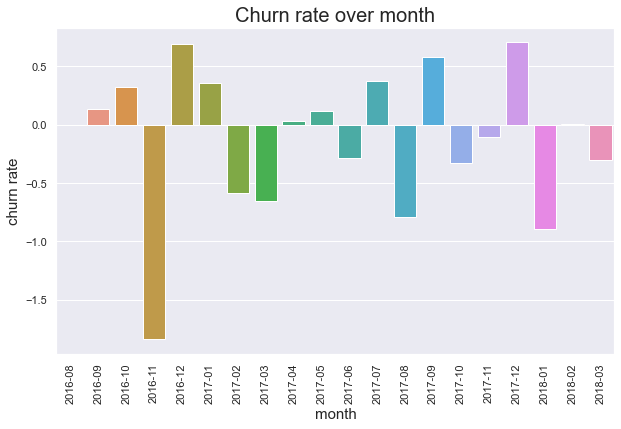

In [469]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(df7_1.month_year, df7_1.churn_rate)
plt.title('Churn rate over month', size=20)
ax.tick_params(axis="x", rotation=90)
plt.ylabel('churn rate', size=15)
plt.xlabel('month', size=15)
plt.show()

The number of unique customers is decreasing overally.

##### Retention rate

In [470]:
df_orders = orders

In [471]:
df_orders['order_month'] = df_orders['order_created_at'].dt.to_period('M')

In [472]:
df_orders['cohort_month'] = df_orders.groupby('customer_id')['order_month'].transform('min')

In [473]:
df_orders.head()

,order_id,order_created_at,order_closed_at,cancelled_at,customer_id,financial_status,fulfillment_status,processed_at,total_price,shipping_rate,subtotal_price,total_discounts,total_line_items_price,order_month,cohort_month
0,7675398239,2016-08-21,2016-08-25,2016-08-22,8683754719,voided,NaN,2016-08-21,44.57,6.33,35.0,0.0,35.0,2016-08,2016-08
1,7676331935,2016-08-22,2016-08-22,NaN,8686224991,refunded,NaN,2016-08-22,124.55,0.00,114.0,0.0,114.0,2016-08,2016-08
2,7676363167,2016-08-22,NaN,2016-08-22,8686224991,voided,NaN,2016-08-22,97.68,7.00,83.0,0.0,83.0,2016-08,2016-08
3,7676539359,2016-08-22,2016-08-22,NaN,8686915935,paid,fulfilled,2016-08-22,131.10,0.00,120.0,0.0,120.0,2016-08,2016-08
4,7676549855,2016-08-22,2016-08-22,NaN,8686924319,paid,fulfilled,2016-08-22,91.12,7.00,77.0,0.0,77.0,2016-08,2016-08


In [474]:
grouped = df_orders.groupby(['cohort_month','order_month'])

In [475]:
cohorts = grouped.agg({'customer_id': pd.Series.nunique,
                      'order_id': pd.Series.nunique})
cohorts.rename(columns={'customer_id':'total_customers',
                       'order_id':'total_orders'}, inplace=True)

In [476]:
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

total_customers  total_orders  cohort_period
cohort_month order_month                                              
2016-08      2016-08                 1433          1554              1
             2016-09                  123           155              2
             2016-10                   45            48              3
             2016-11                  188           224              4
             2016-12                   50            52              5

In [477]:
cohorts.head()


total_customers  total_orders  cohort_period
cohort_month order_month                                              
2016-08      2016-08                 1433          1554              1
             2016-09                  123           155              2
             2016-10                   45            48              3
             2016-11                  188           224              4
             2016-12                   50            52              5

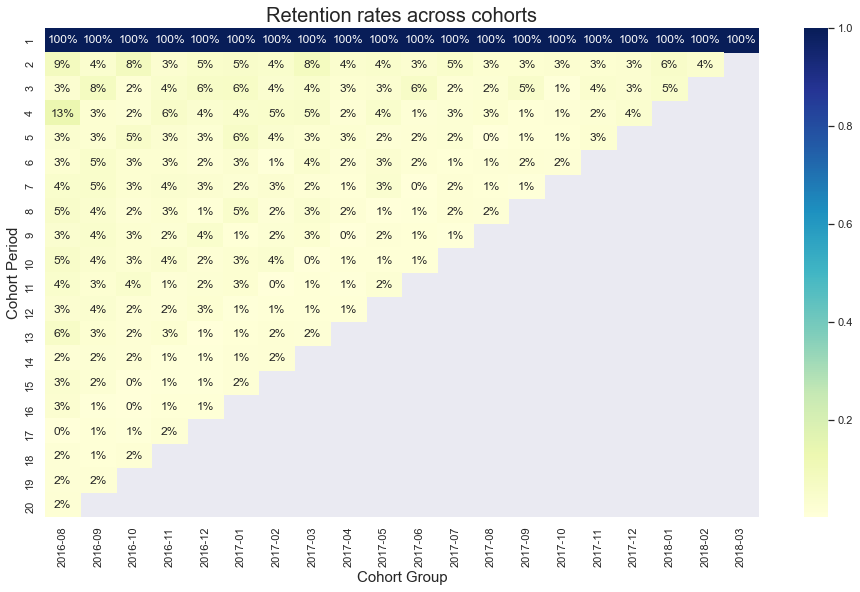

In [478]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_month', 'cohort_period'], inplace=True)

cohort_sizes = cohorts.groupby(level=0)['total_customers'].first()

user_retention = cohorts['total_customers'].unstack(0).divide(cohort_sizes, axis = 1)
plt.figure(figsize=(16,9))
ax = sns.heatmap(user_retention, annot=True,cmap="YlGnBu", fmt='.0%')

ax.set_ylabel('Cohort Period', fontsize = 15)
ax.set_xlabel('Cohort Group', fontsize = 15)

ax.set_title('Retention rates across cohorts', fontsize = 20)
plt.show()

In the cohort period 2, the retentin rate is less than 10%. After the first purchase, we can see that over 90% customers will not purchase again in the second month. It is not good for this online store if the store seeks for sustainable growth, we should focus on the old customers.

##### RFM analysis

In order to improve the retention rate, we need to get a better understanding of the old customers.

Instead of analyzing the entire customer base as a whole, it’s better to segment them into homogeneous groups, understand the traits of each group, and engage them with relevant campaigns rather than segmenting on just customer age or geography.

One of the most popular, easy-to-use, and effective segmentation methods to enable marketers to analyze customer behavior is RFM analysis.

In [479]:
last_date = dt.datetime(2018,4,1)

In [480]:
last_date

datetime.datetime(2018, 4, 1, 0, 0)

In [481]:
orders.head()

,order_id,order_created_at,order_closed_at,cancelled_at,customer_id,financial_status,fulfillment_status,processed_at,total_price,shipping_rate,subtotal_price,total_discounts,total_line_items_price,order_month,cohort_month
0,7675398239,2016-08-21,2016-08-25,2016-08-22,8683754719,voided,NaN,2016-08-21,44.57,6.33,35.0,0.0,35.0,2016-08,2016-08
1,7676331935,2016-08-22,2016-08-22,NaN,8686224991,refunded,NaN,2016-08-22,124.55,0.00,114.0,0.0,114.0,2016-08,2016-08
2,7676363167,2016-08-22,NaN,2016-08-22,8686224991,voided,NaN,2016-08-22,97.68,7.00,83.0,0.0,83.0,2016-08,2016-08
3,7676539359,2016-08-22,2016-08-22,NaN,8686915935,paid,fulfilled,2016-08-22,131.10,0.00,120.0,0.0,120.0,2016-08,2016-08
4,7676549855,2016-08-22,2016-08-22,NaN,8686924319,paid,fulfilled,2016-08-22,91.12,7.00,77.0,0.0,77.0,2016-08,2016-08


In [482]:
rfm = orders.groupby('customer_id').agg({'order_created_at': lambda x: (last_date - x.max()).days, 
                                         'order_id': lambda x: len(x),
                                         'total_price': lambda x: x.sum()})

In [483]:
rfm.rename(columns={'order_created_at': 'recency',
                   'order_id': 'frequency',
                   'total_price': 'monetary'}, inplace=True)

In [484]:
rfm = rfm.reset_index()

In [485]:
rfm.head()

,customer_id,recency,frequency,monetary
0,8683754719,367,10,875.80
1,8686224991,425,10,286.33
2,8686913503,303,3,140.28
3,8686915935,587,1,131.10
4,8686924319,587,1,91.12


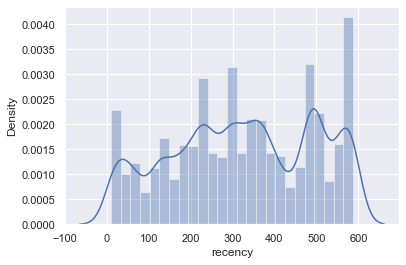

In [486]:
# recency distribution plot
sns.distplot(rfm['recency'])
plt.show()

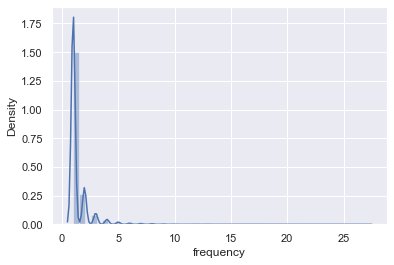

In [487]:
# frequency distribution plot
sns.distplot(rfm['frequency'])
plt.show()

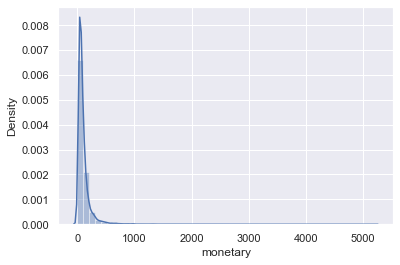

In [488]:
# monetary distribution plot
sns.distplot(rfm['monetary'])
plt.show()

In [489]:
# split into four segments using quantiles
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [490]:
quantiles

{'customer_id': {0.25: 8847997423.0,
  0.5: 394172863997.0,
  0.75: 611449583101.0},
 'recency': {0.25: 199.0, 0.5: 329.0, 0.75: 490.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary': {0.25: 43.79, 0.5: 69.305, 0.75: 117.9}}

In [491]:
def Rscore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def Fscore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    
def Mscore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [492]:
rfm['R'] = rfm['recency'].apply(Rscore, args=('recency', quantiles))
rfm['F'] = rfm['frequency'].apply(Fscore, args=('frequency', quantiles))
rfm['M'] = rfm['monetary'].apply(Mscore, args=('monetary', quantiles))

In [493]:
rfm.head()

,customer_id,recency,frequency,monetary,R,F,M
0,8683754719,367,10,875.80,3,1,1
1,8686224991,425,10,286.33,3,1,1
2,8686913503,303,3,140.28,2,1,1
3,8686915935,587,1,131.10,4,4,1
4,8686924319,587,1,91.12,4,4,2


In [494]:
# calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm['RFMGroup'] = rfm.R.map(str) + rfm.F.map(str) + rfm.M.map(str)

# calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm['RFMScore'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,customer_id,recency,frequency,monetary,R,F,M,RFMGroup,RFMScore
0,8683754719,367,10,875.80,3,1,1,311,5
1,8686224991,425,10,286.33,3,1,1,311,5
2,8686913503,303,3,140.28,2,1,1,211,4
3,8686915935,587,1,131.10,4,4,1,441,9
4,8686924319,587,1,91.12,4,4,2,442,10


In [495]:
# assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(rfm.RFMScore, q = 4, labels = Loyalty_Level)
rfm['RFM_Loyalty_Level'] = Score_cuts.values
rfm.reset_index().head()

,index,customer_id,recency,frequency,monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,0,8683754719,367,10,875.80,3,1,1,311,5,Platinum
1,1,8686224991,425,10,286.33,3,1,1,311,5,Platinum
2,2,8686913503,303,3,140.28,2,1,1,211,4,Platinum
3,3,8686915935,587,1,131.10,4,4,1,441,9,Gold
4,4,8686924319,587,1,91.12,4,4,2,442,10,Silver


In [496]:
rfm[rfm['RFMGroup']=='111'].sort_values('monetary', ascending=False).head()

,customer_id,recency,frequency,monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
483,8689196063,179,20,5195.58,1,1,1,111,3,Platinum
644,8689371999,137,25,5076.00,1,1,1,111,3,Platinum
2208,8705718751,60,19,2847.56,1,1,1,111,3,Platinum
3822,8849705567,129,17,2723.09,1,1,1,111,3,Platinum
1748,8693553375,79,13,2504.51,1,1,1,111,3,Platinum


In [497]:
# handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
# apply handle_neg_n_zero function to Recency and Monetary columns 
rfm['recency'] = [handle_neg_n_zero(x) for x in rfm.recency]
rfm['monetary'] = [handle_neg_n_zero(x) for x in rfm.monetary]

# perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm[['recency', 'frequency', 'monetary']].apply(np.log, axis = 1).round(3)

In [498]:
Log_Tfd_Data.head()

,recency,frequency,monetary
0,5.905,2.303,6.775
1,6.052,2.303,5.657
2,5.714,1.099,4.944
3,6.375,0.000,4.876
4,6.375,0.000,4.512


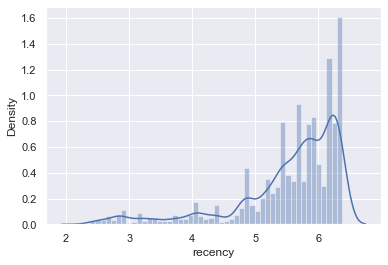

In [499]:
sns.distplot(Log_Tfd_Data.recency)
plt.show()

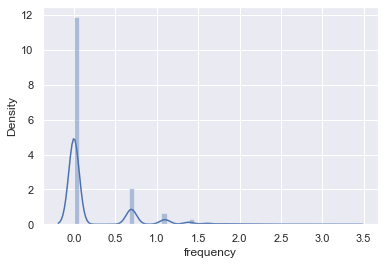

In [500]:
sns.distplot(Log_Tfd_Data.frequency)
plt.show()

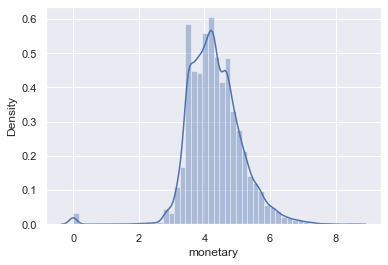

In [501]:
sns.distplot(Log_Tfd_Data.monetary)
plt.show()

In [502]:
from sklearn.preprocessing import StandardScaler

# bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

# transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = rfm.index, columns = Log_Tfd_Data.columns)

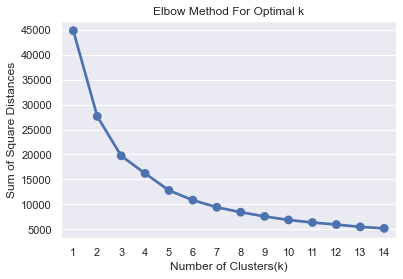

In [503]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [504]:
# build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 5, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

KMeans(max_iter=1000, n_clusters=5)

In [505]:
# find the clusters for the observation given in the dataset
rfm['Cluster'] = KMean_clust.labels_
rfm.head()

,customer_id,recency,frequency,monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
0,8683754719,367,10,875.80,3,1,1,311,5,Platinum,3
1,8686224991,425,10,286.33,3,1,1,311,5,Platinum,3
2,8686913503,303,3,140.28,2,1,1,211,4,Platinum,1
3,8686915935,587,1,131.10,4,4,1,441,9,Gold,2
4,8686924319,587,1,91.12,4,4,2,442,10,Silver,2


<Figure size 504x504 with 0 Axes>

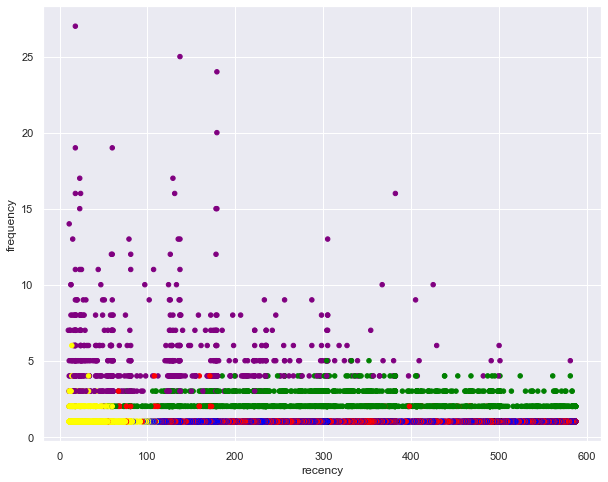

In [506]:
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue", 'purple', 'yellow']
rfm['Color'] = rfm['Cluster'].map(lambda p: Colors[p])
ax = rfm.plot(    
    kind="scatter", 
    x="recency", y="frequency",
    figsize=(10,8),
    c = rfm['Color']
)
plt.show()

<Figure size 504x504 with 0 Axes>

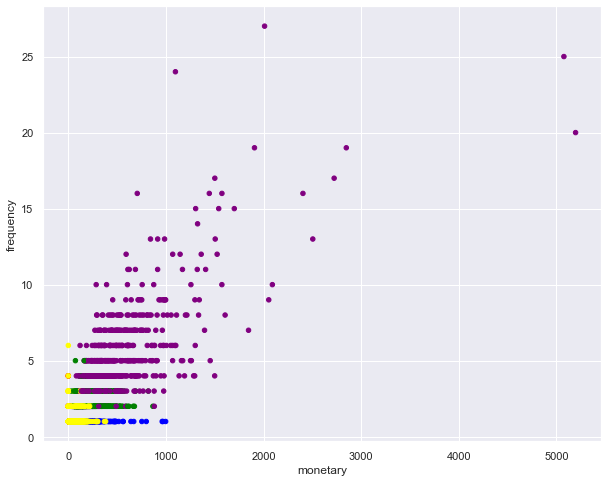

In [507]:
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue", 'purple', 'yellow']
rfm['Color'] = rfm['Cluster'].map(lambda p: Colors[p])
ax = rfm.plot(    
    kind="scatter", 
    x="monetary", y="frequency",
    figsize=(10,8),
    c = rfm['Color']
)
plt.show()

<Figure size 504x504 with 0 Axes>

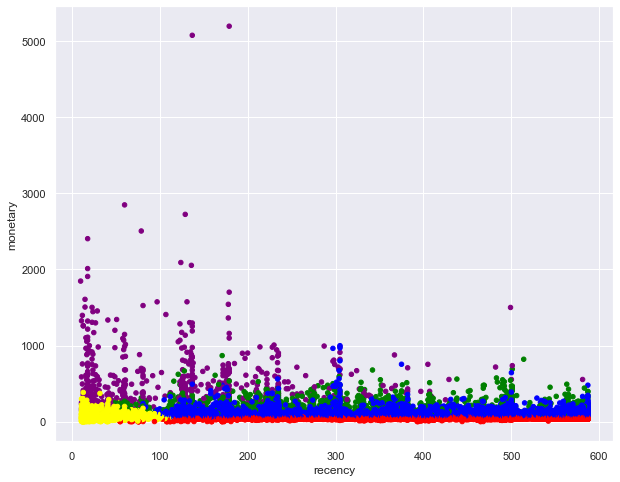

In [508]:
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue", 'purple', 'yellow']
rfm['Color'] = rfm['Cluster'].map(lambda p: Colors[p])
ax = rfm.plot(    
    kind="scatter", 
    x="recency", y="monetary",
    figsize=(10,8),
    c = rfm['Color']
)
plt.show()

In [509]:
rfm.head()


,customer_id,recency,frequency,monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
0,8683754719,367,10,875.80,3,1,1,311,5,Platinum,3,purple
1,8686224991,425,10,286.33,3,1,1,311,5,Platinum,3,purple
2,8686913503,303,3,140.28,2,1,1,211,4,Platinum,1,green
3,8686915935,587,1,131.10,4,4,1,441,9,Gold,2,blue
4,8686924319,587,1,91.12,4,4,2,442,10,Silver,2,blue


#### Summary of the clusters and marketing strategy based on RFM analysis

**<span style="color:green">Cluster 1</span>**

- **At Risk Customers** This group of customers who spent big amounts, but haven’t purchased recently. 

- Send them personalized reactivation campaigns to reconnect, and offer renewals and helpful products to encourage another purchase.

**<span style="color:blue">Cluster 2</span>**

- **New Customers** This group of customers who have a high overall recency score but are not frequent shoppers. 
- Start building relationships with these customers by providing onboarding support and special offers to increase their visits.

**<span style="color:purple">Cluster 3</span>**

- **Champions** This group of customers are the best customers, who bought most recently, most often, and are heavy spenders. 

- Reward these customers. They can become early adopters for new products and will help promote the brand.


**<span style="color:yellow">Cluster 4</span>**

- **Require Activation** Poorest performers of our RFM model. They might have went with our competitors for now and will require a different activation strategy to win them back. 

- Bring them back with relevant promotions, and run surveys to find out what went wrong and avoid losing them to a competitor.


**<span style="color:red">Cluster 0</span>**

- **Potential Loyalists** This group of customers with average frequency and who spent a good amount. 

- Offer membership or loyalty programs or recommend related products to upsell them and help them become your Loyalists or Champions.